# AIVLE스쿨 1차 미니프로젝트: 서울시 생활정보 기반 대중교통 수요 분석

<img src = "https://github.com/Jangrae/img/blob/master/bus.png?raw=true" width=800, align="left"/>

- 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
- 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다.

### 로컬 수행(Anaconda)
- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# 기본 경로
path = ''

### 필요한 라이브러리를 불러옵니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import koreanize_matplotlib
import seaborn as sns
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [3]:
# 맑은 고딕으로 한글 사용
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

## ▣ 우리가 풀어야 하는 문제

- 제공 데이터
    - 버스 승하차 및 운행 노선 데이터
    - 구별 유동인구 데이터
    - 구별 주민 등록 데이터
    - 구별 업종 등록 정보
    
#### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정

# 1. 데이터 불러오기

- 이전 과정에서 저장한 다음 4개의 파일을 불러와 데이터프레임으로 선언합니다.
    - 구별 버스 정류장 데이터(df_seoul_bus_station.csv) → df_seoul_bus_station
    - 구별 유동인구 데이터(df_seoul_moving.csv) → df_seoul_moving
    - 구별 상권 데이터(df_seoul_business.csv) → df_seoul_business
    - 구별 인구 데이터(df_seoul_people.csv) → df_seoul_people

In [4]:
# 구별 버스 정류장 데이터불러오기
df_seoul_bus_station = pd.read_csv(path + 'df_seoul_bus_station.csv')

# 확인
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,502,99,9113021,8640353,135.163908,128.153318
1,강동구,376,24,3306588,3242901,94.638885,92.816079
2,강북구,410,71,5244436,5077041,138.244306,133.831743
3,강서구,565,54,5244615,5218001,93.106837,92.634362
4,관악구,465,82,7691243,7850254,147.777793,150.832994


In [5]:
# 구별 유동인구 데이터 불러오기
df_seoul_moving = pd.read_csv(path + 'df_seoul_moving.csv')

# 확인
df_seoul_moving.head()

,자치구,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,65.220874,89.880083,37563832,51766253.76
1,강동구,71.135695,67.088111,27212889,25664489.79
2,강북구,65.258796,38.290780,24201877,14200518.80
3,강서구,70.107829,59.547527,30772920,26137612.75
4,관악구,63.064536,47.985346,27629141,21022812.01


In [6]:
#  구별 상권 데이터 불러오기
df_seoul_business = pd.read_csv(path + 'df_seoul_business.csv')

# 확인
df_seoul_business.head()

,자치구,택시운송업,한식 일반 음식점업,용달 화물자동차 운송업,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점
0,종로구,215,5912,646,889,480,3613,962,1413,382,1982
1,중구,235,6414,333,1152,816,3542,24248,982,175,2121
2,용산구,523,2987,466,1214,777,2076,317,1332,573,1184
3,성동구,2527,2785,1161,1453,851,1859,1572,621,1494,1545
4,광진구,1744,2861,985,1313,1337,1887,687,1577,1646,1678


In [7]:
# 구별 인구 데이터 불러오기
df_seoul_people = pd.read_csv(path + 'df_seoul_people.csv')

# 확인
df_seoul_people.head()

,자치구,남자,여자,합계
0,종로구,71654,78390,150044
1,중구,63365,68392,131757
2,용산구,105480,113343,218823
3,성동구,136779,146555,283334
4,광진구,166541,183141,349682


# 2. 데이터 합치기

- 위에서 선언한 네 개의 데이터프레임을 '자치구'열을 기준으로 조인(merge)합니다.
- 조인 결과를 df 데이터프레임으로 선언합니다.

In [8]:
# 네 개의 데이터프레임 조인(megre)
df = pd.merge(df_seoul_bus_station, df_seoul_moving, how='inner', on='자치구')
df = pd.merge(df, df_seoul_business, how='inner', on='자치구')
df = pd.merge(df, df_seoul_people, how='inner', on='자치구')

In [9]:
# 확인
df.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,...,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점,남자,여자,합계
0,강남구,502,99,9113021,8640353,135.163908,128.153318,65.220874,89.880083,37563832,...,6508,6255,7273,8320,2528,9020,5008,268993,293762,562755
1,강동구,376,24,3306588,3242901,94.638885,92.816079,71.135695,67.088111,27212889,...,1990,1429,1660,1433,1349,2104,1459,228197,239705,467902
2,강북구,410,71,5244436,5077041,138.244306,133.831743,65.258796,38.290780,24201877,...,867,997,1095,94,1275,740,1176,139260,150567,289827
3,강서구,565,54,5244615,5218001,93.106837,92.634362,70.107829,59.547527,30772920,...,2352,1751,2530,700,1709,2347,2274,270025,294460,564485
4,관악구,465,82,7691243,7850254,147.777793,150.832994,63.064536,47.985346,27629141,...,2136,1604,2049,190,1672,1230,1628,248571,248566,497137


In [10]:
# 모든 행 표시 
pd.set_option('display.max_columns', None)

In [11]:
df['승하차 총승객수'] = df['승차총승객수']+df['하차총승객수']
df['승하차 평균승객수'] = df['승차평균승객수']+df['하차평균승객수']

In [12]:
df

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,택시운송업,한식 일반 음식점업,용달 화물자동차 운송업,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점,남자,여자,합계,승하차 총승객수,승하차 평균승객수
0,강남구,502,99,9113021,8640353,135.163908,128.153318,65.220874,89.880083,37563832,51766253.76,2517,11486,487,6508,6255,7273,8320,2528,9020,5008,268993,293762,562755,17753374,263.317226
1,강동구,376,24,3306588,3242901,94.638885,92.816079,71.135695,67.088111,27212889,25664489.79,4980,3388,1566,1990,1429,1660,1433,1349,2104,1459,228197,239705,467902,6549489,187.454964
2,강북구,410,71,5244436,5077041,138.244306,133.831743,65.258796,38.290780,24201877,14200518.80,2589,2663,1030,867,997,1095,94,1275,740,1176,139260,150567,289827,10321477,272.076049
3,강서구,565,54,5244615,5218001,93.106837,92.634362,70.107829,59.547527,30772920,26137612.75,6922,4584,1862,2352,1751,2530,700,1709,2347,2274,270025,294460,564485,10462616,185.741199
4,관악구,465,82,7691243,7850254,147.777793,150.832994,63.064536,47.985346,27629141,21022812.01,2027,3689,1600,2136,1604,2049,190,1672,1230,1628,248571,248566,497137,15541497,298.610787
5,광진구,278,43,3207725,3228754,118.756247,119.534782,60.205262,44.344913,26680865,19652113.55,1744,2861,985,1313,1337,1887,687,1577,1646,1678,166541,183141,349682,6436479,238.291030
6,구로구,478,81,5525646,5324566,125.119353,120.566221,63.983186,43.321989,26223125,17755257.26,3817,3215,1351,1213,1134,1384,923,1165,1111,1496,203142,209735,412877,10850212,245.685574
7,금천구,344,56,3990114,3839246,129.954208,125.040581,65.848807,30.799340,19914918,9314767.58,2598,2619,997,1381,715,1215,2575,685,487,1042,121008,119081,240089,7829360,254.994789
8,노원구,495,61,4609496,4535591,88.736303,87.313576,66.705984,52.344090,28370322,22262150.94,6074,2650,1736,1053,1353,1748,123,844,3281,1557,239118,260343,499461,9145087,176.049879
9,도봉구,366,57,3575712,3493061,110.579911,108.023905,66.683308,36.915026,22711868,12572999.34,5783,2009,1574,794,847,837,43,477,1162,943,148622,159162,307784,7068773,218.603816


# 3. 가설 수립 
$ \huge X \rightarrow Y $

In [13]:
df.columns

Index(['자치구', '정류장수', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수',
       '평균 이동 시간(분)', '이동인구(합)', '총 이동 시간', '총 이동인구', '택시운송업', '한식 일반 음식점업',
       '용달 화물자동차 운송업', '부동산 중개 및 대리업', '두발미용업', '커피전문점', '남녀용 겉옷 및 셔츠 도매업',
       '기타주점업', '일반 교과 학원', '한식 육류요리 전문점', '남자', '여자', '합계', '승하차 총승객수',
       '승하차 평균승객수'],
      dtype='object')

### 1) 가설 1: 노선수는 자치구 별 인구수, 승하차인구수, 음식점수와 비례할 것이다. 


### 2) 가설 2: 평균이동시간이 길수록 승하차승객수는 적을 것이다. 


### 3) 가설 3: 업종에 따라 이동 인구, 평균 이동 인구에 차이가 있다면 노선수를 확충해야한다. 


### 4) 가설 4: 총 이동인구가 많을수록 정류장 수가 많을 것이다. 


### 5) 가설 5: 자치구 크기에 따라 평균 이동 시간에 차이가 있을 것이다. 


### 6) 가설 6: 자치구 크기 별 음식점수 비율이 높다면 노선수와 정류장 수가 비례할 것이다. 


# 4. 단변량 분석

In [14]:
df.columns

Index(['자치구', '정류장수', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수',
       '평균 이동 시간(분)', '이동인구(합)', '총 이동 시간', '총 이동인구', '택시운송업', '한식 일반 음식점업',
       '용달 화물자동차 운송업', '부동산 중개 및 대리업', '두발미용업', '커피전문점', '남녀용 겉옷 및 셔츠 도매업',
       '기타주점업', '일반 교과 학원', '한식 육류요리 전문점', '남자', '여자', '합계', '승하차 총승객수',
       '승하차 평균승객수'],
      dtype='object')

### 1)

In [15]:
# 주석
df1 = df[['자치구', '노선수','합계', '승차총승객수', '하차총승객수', '한식 일반 음식점업', '커피전문점', '기타주점업', '한식 육류요리 전문점']]
df1.head()

,자치구,노선수,합계,승차총승객수,하차총승객수,한식 일반 음식점업,커피전문점,기타주점업,한식 육류요리 전문점
0,강남구,99,562755,9113021,8640353,11486,7273,2528,5008
1,강동구,24,467902,3306588,3242901,3388,1660,1349,1459
2,강북구,71,289827,5244436,5077041,2663,1095,1275,1176
3,강서구,54,564485,5244615,5218001,4584,2530,1709,2274
4,관악구,82,497137,7691243,7850254,3689,2049,1672,1628


In [16]:
print(df1.isnull().sum())
print(df1.describe())

자치구            0
노선수            0
합계             0
승차총승객수         0
하차총승객수         0
한식 일반 음식점업     0
커피전문점          0
기타주점업          0
한식 육류요리 전문점    0
dtype: int64
              노선수             합계        승차총승객수        하차총승객수   한식 일반 음식점업  \
count   25.000000      25.000000  2.500000e+01  2.500000e+01     25.00000   
mean    75.840000  384530.680000  5.421663e+06  5.318501e+06   4007.32000   
std     23.487018  126587.549792  1.508670e+06  1.482296e+06   2132.72849   
min     24.000000  131757.000000  3.185165e+06  3.134742e+06   2009.00000   
25%     57.000000  307784.000000  4.384564e+06  4.238810e+06   2663.00000   
50%     75.000000  389003.000000  5.483153e+06  5.292264e+06   2987.00000   
75%    100.000000  467902.000000  6.172655e+06  6.176516e+06   4705.00000   
max    109.000000  658360.000000  9.113021e+06  8.640353e+06  11486.00000   

             커피전문점        기타주점업  한식 육류요리 전문점  
count    25.000000    25.000000    25.000000  
mean   2292.880000  1254.840000  1786.120000  

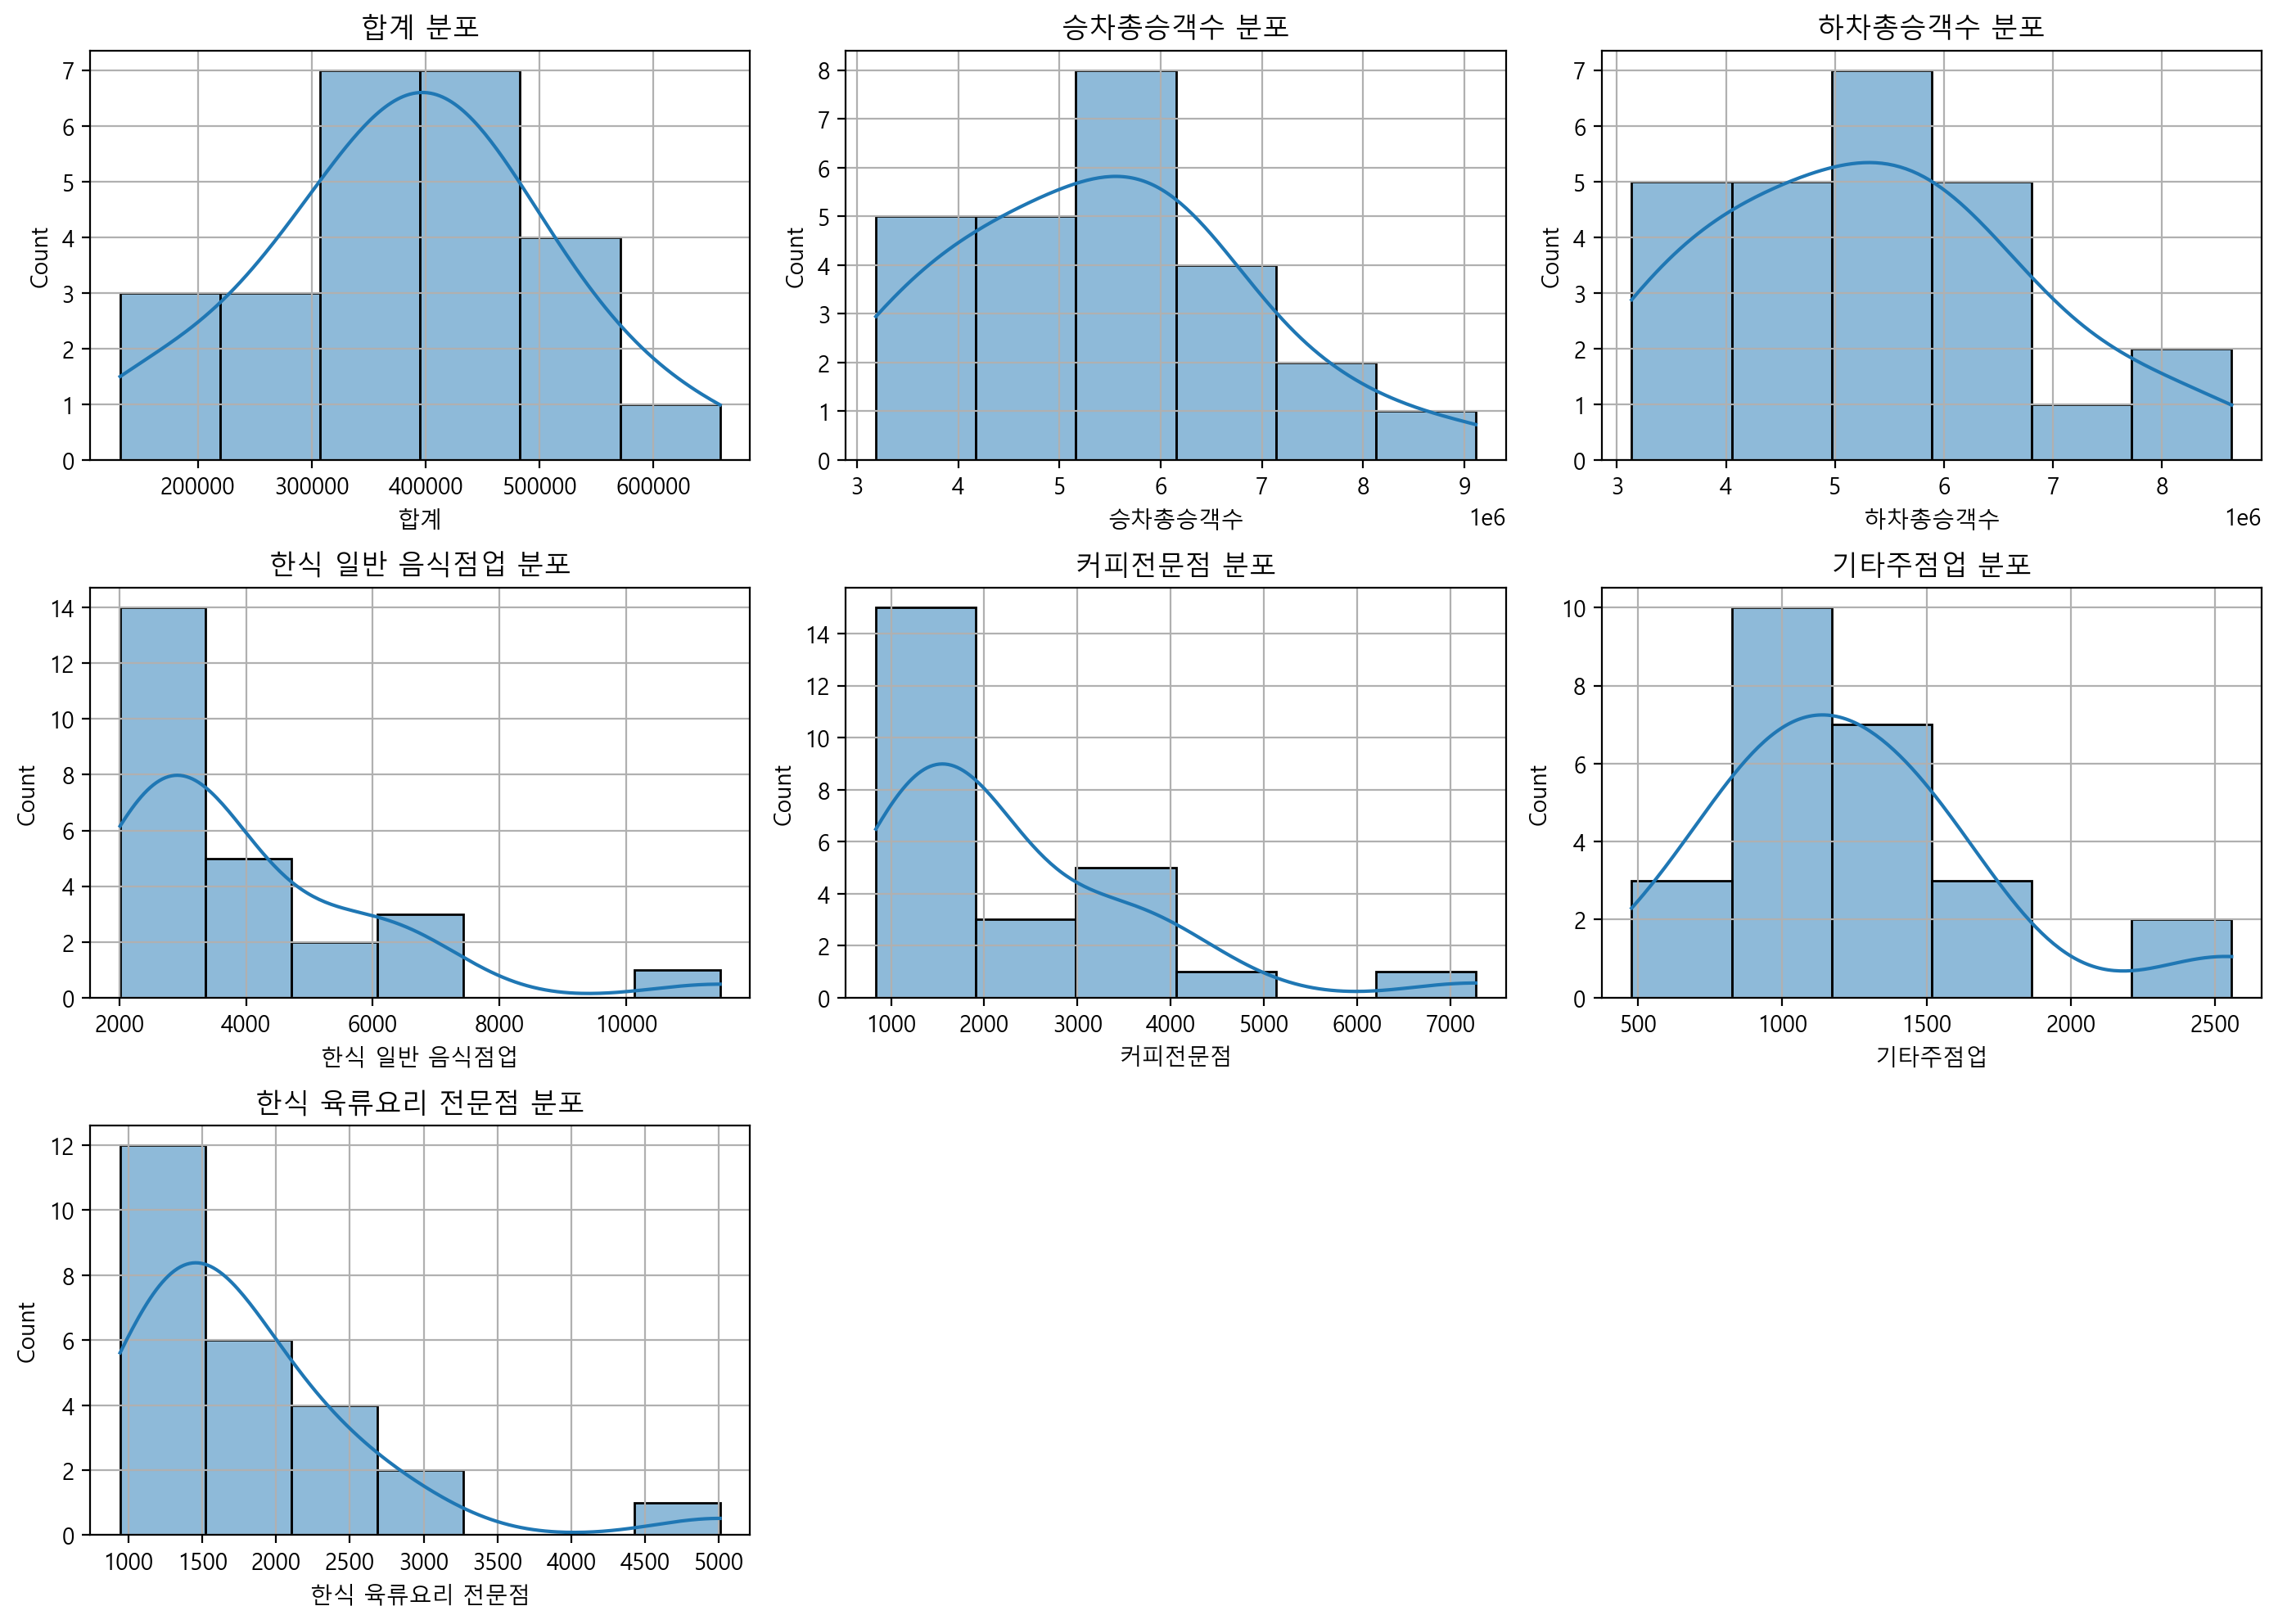

In [17]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 3, 1)
sns.histplot(df1['합계'], kde=True)
plt.title('합계 분포')
plt.grid()

plt.subplot(3, 3, 2)
sns.histplot(df1['승차총승객수'], kde=True)
plt.title('승차총승객수 분포')
plt.grid()

plt.subplot(3, 3, 3)
sns.histplot(df1['하차총승객수'], kde=True)
plt.title('하차총승객수 분포')
plt.grid()

plt.subplot(3, 3, 4)
sns.histplot(df1['한식 일반 음식점업'], kde=True)
plt.title('한식 일반 음식점업 분포')
plt.grid()

plt.subplot(3, 3, 5)
sns.histplot(df1['커피전문점'], kde=True)
plt.title('커피전문점 분포')
plt.grid()

plt.subplot(3, 3, 6)
sns.histplot(df1['기타주점업'], kde=True)
plt.title('기타주점업 분포')
plt.grid()

plt.subplot(3, 3, 7)
sns.histplot(df1['한식 육류요리 전문점'], kde=True)
plt.title('한식 육류요리 전문점 분포')
plt.grid()

plt.tight_layout()
plt.show()

- 합계 정규분포
- 한식 일반 음식점업, 커피 전문점, 한식 육류 요리 전문점은 우측 왜도 양의 첨도 
- 승차 총 승객수, 하차 총 승객수, 기타 주점업 위의 변수 보단 상대적으로 작은 우측 왜도, 양의 첨도를 가짐

### 2)

In [18]:
df2 = df[['자치구', '평균 이동 시간(분)', '승하차 총승객수']]
df2.head()

,자치구,평균 이동 시간(분),승하차 총승객수
0,강남구,65.220874,17753374
1,강동구,71.135695,6549489
2,강북구,65.258796,10321477
3,강서구,70.107829,10462616
4,관악구,63.064536,15541497


In [19]:
print(df2.isnull().sum())
print(df2.describe())

자치구            0
평균 이동 시간(분)    0
승하차 총승객수       0
dtype: int64
       평균 이동 시간(분)      승하차 총승객수
count    25.000000  2.500000e+01
mean     62.947805  1.074016e+07
std       4.293887  2.988618e+06
min      56.495425  6.319907e+06
25%      59.917230  8.623374e+06
50%      62.806200  1.077542e+07
75%      65.848807  1.234917e+07
max      71.135695  1.775337e+07


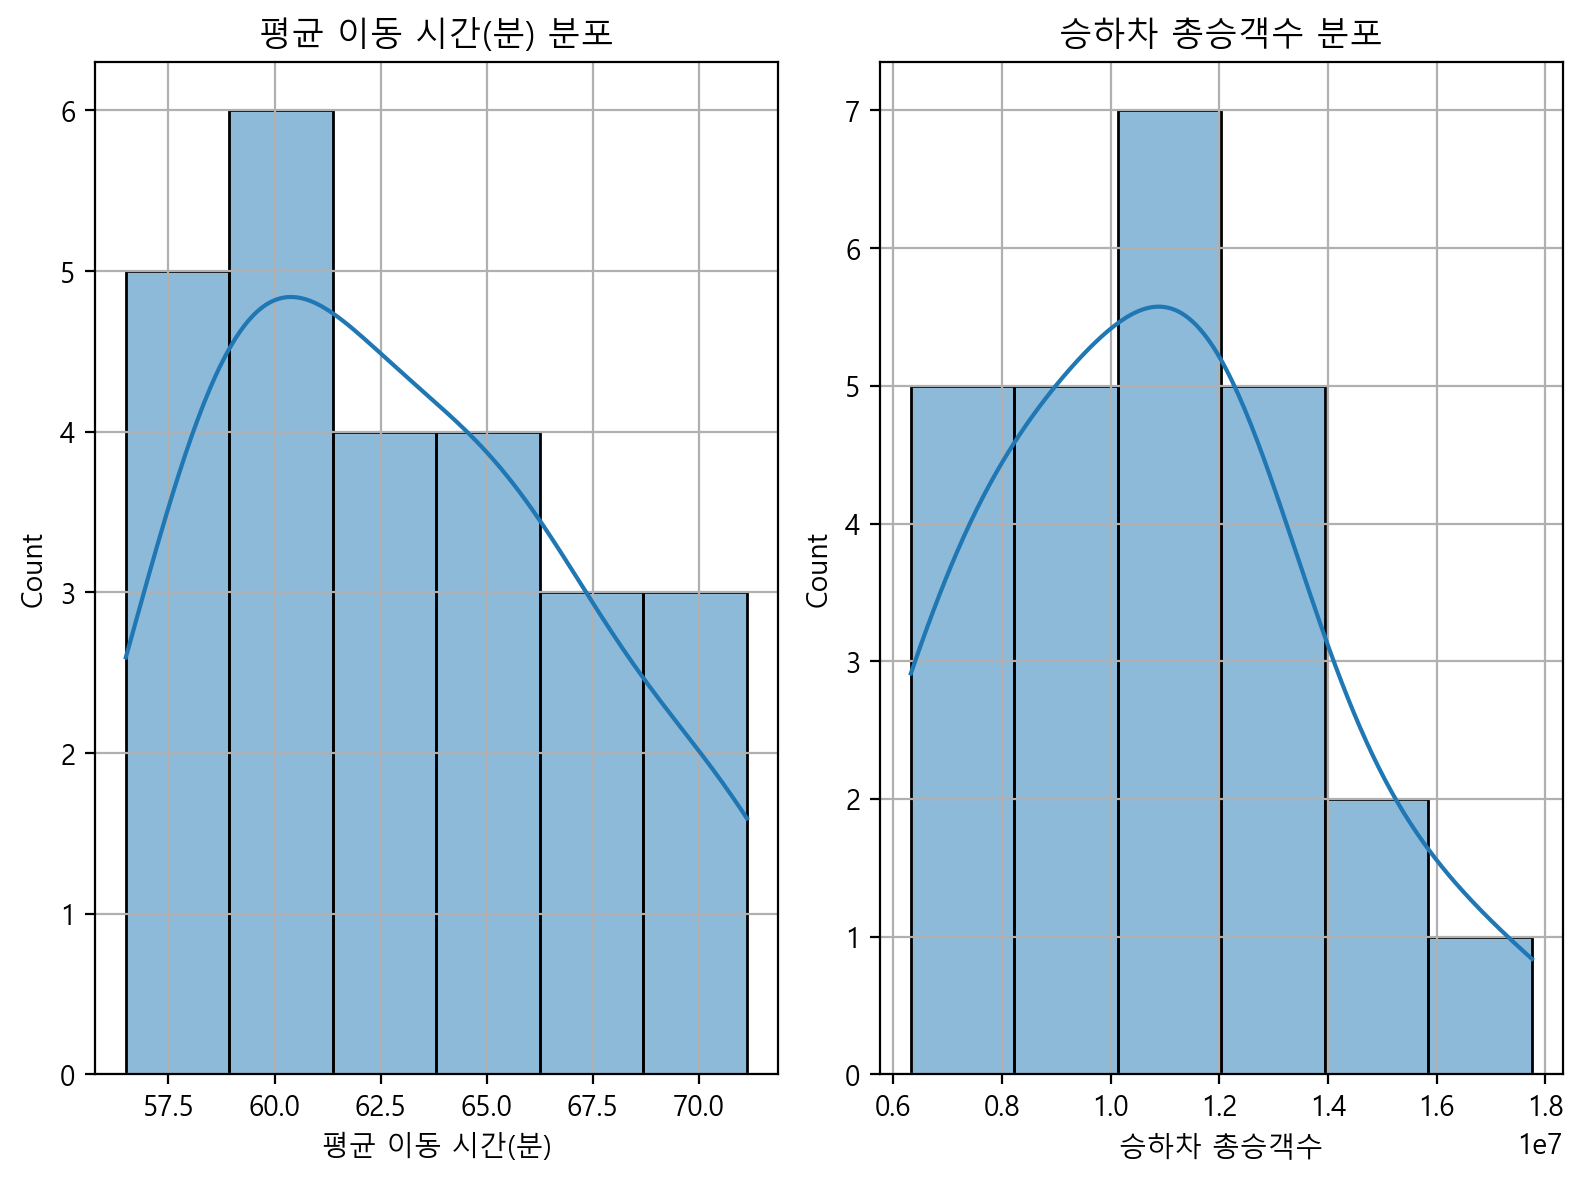

In [20]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.histplot(df2['평균 이동 시간(분)'], kde=True)
plt.title('평균 이동 시간(분) 분포')
plt.grid()

plt.subplot(1, 2, 2)
sns.histplot(df2['승하차 총승객수'], kde=True)
plt.title('승하차 총승객수 분포')
plt.grid()

plt.tight_layout()
plt.show()

- 평균 이동 시간, 승하차 총 승객수 모두 미미한 우측 왜도 

### 3)

In [21]:
df3 = df[['자치구', '이동인구(합)', '승하차 평균승객수', '택시운송업', '한식 일반 음식점업',
          '용달 화물자동차 운송업', '부동산 중개 및 대리업', '두발미용업', 
          '커피전문점', '남녀용 겉옷 및 셔츠 도매업', '기타주점업', '일반 교과 학원', 
          '한식 육류요리 전문점']]
df3.head()

,자치구,이동인구(합),승하차 평균승객수,택시운송업,한식 일반 음식점업,용달 화물자동차 운송업,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점
0,강남구,89.880083,263.317226,2517,11486,487,6508,6255,7273,8320,2528,9020,5008
1,강동구,67.088111,187.454964,4980,3388,1566,1990,1429,1660,1433,1349,2104,1459
2,강북구,38.290780,272.076049,2589,2663,1030,867,997,1095,94,1275,740,1176
3,강서구,59.547527,185.741199,6922,4584,1862,2352,1751,2530,700,1709,2347,2274
4,관악구,47.985346,298.610787,2027,3689,1600,2136,1604,2049,190,1672,1230,1628


In [22]:
print(df3.isnull().sum())
print(df3.describe())

자치구                0
이동인구(합)            0
승하차 평균승객수          0
택시운송업              0
한식 일반 음식점업         0
용달 화물자동차 운송업       0
부동산 중개 및 대리업       0
두발미용업              0
커피전문점              0
남녀용 겉옷 및 셔츠 도매업    0
기타주점업              0
일반 교과 학원           0
한식 육류요리 전문점        0
dtype: int64
         이동인구(합)   승하차 평균승객수        택시운송업   한식 일반 음식점업  용달 화물자동차 운송업  \
count  25.000000   25.000000    25.000000     25.00000     25.000000   
mean   49.163789  232.022792  3068.040000   4007.32000   1174.240000   
std    14.360263   34.484418  1963.159772   2132.72849    482.591639   
min    30.799340  165.422506   215.000000   2009.00000    333.000000   
25%    40.110184  205.423772  1838.000000   2663.00000    829.000000   
50%    43.895374  236.926495  2589.000000   2987.00000   1293.000000   
75%    52.706976  259.990774  4850.000000   4705.00000   1566.000000   
max    89.880083  298.610787  6922.000000  11486.00000   1931.000000   

       부동산 중개 및 대리업        두발미용업        커피전문점  남녀용 겉옷 및 셔츠 도매업   

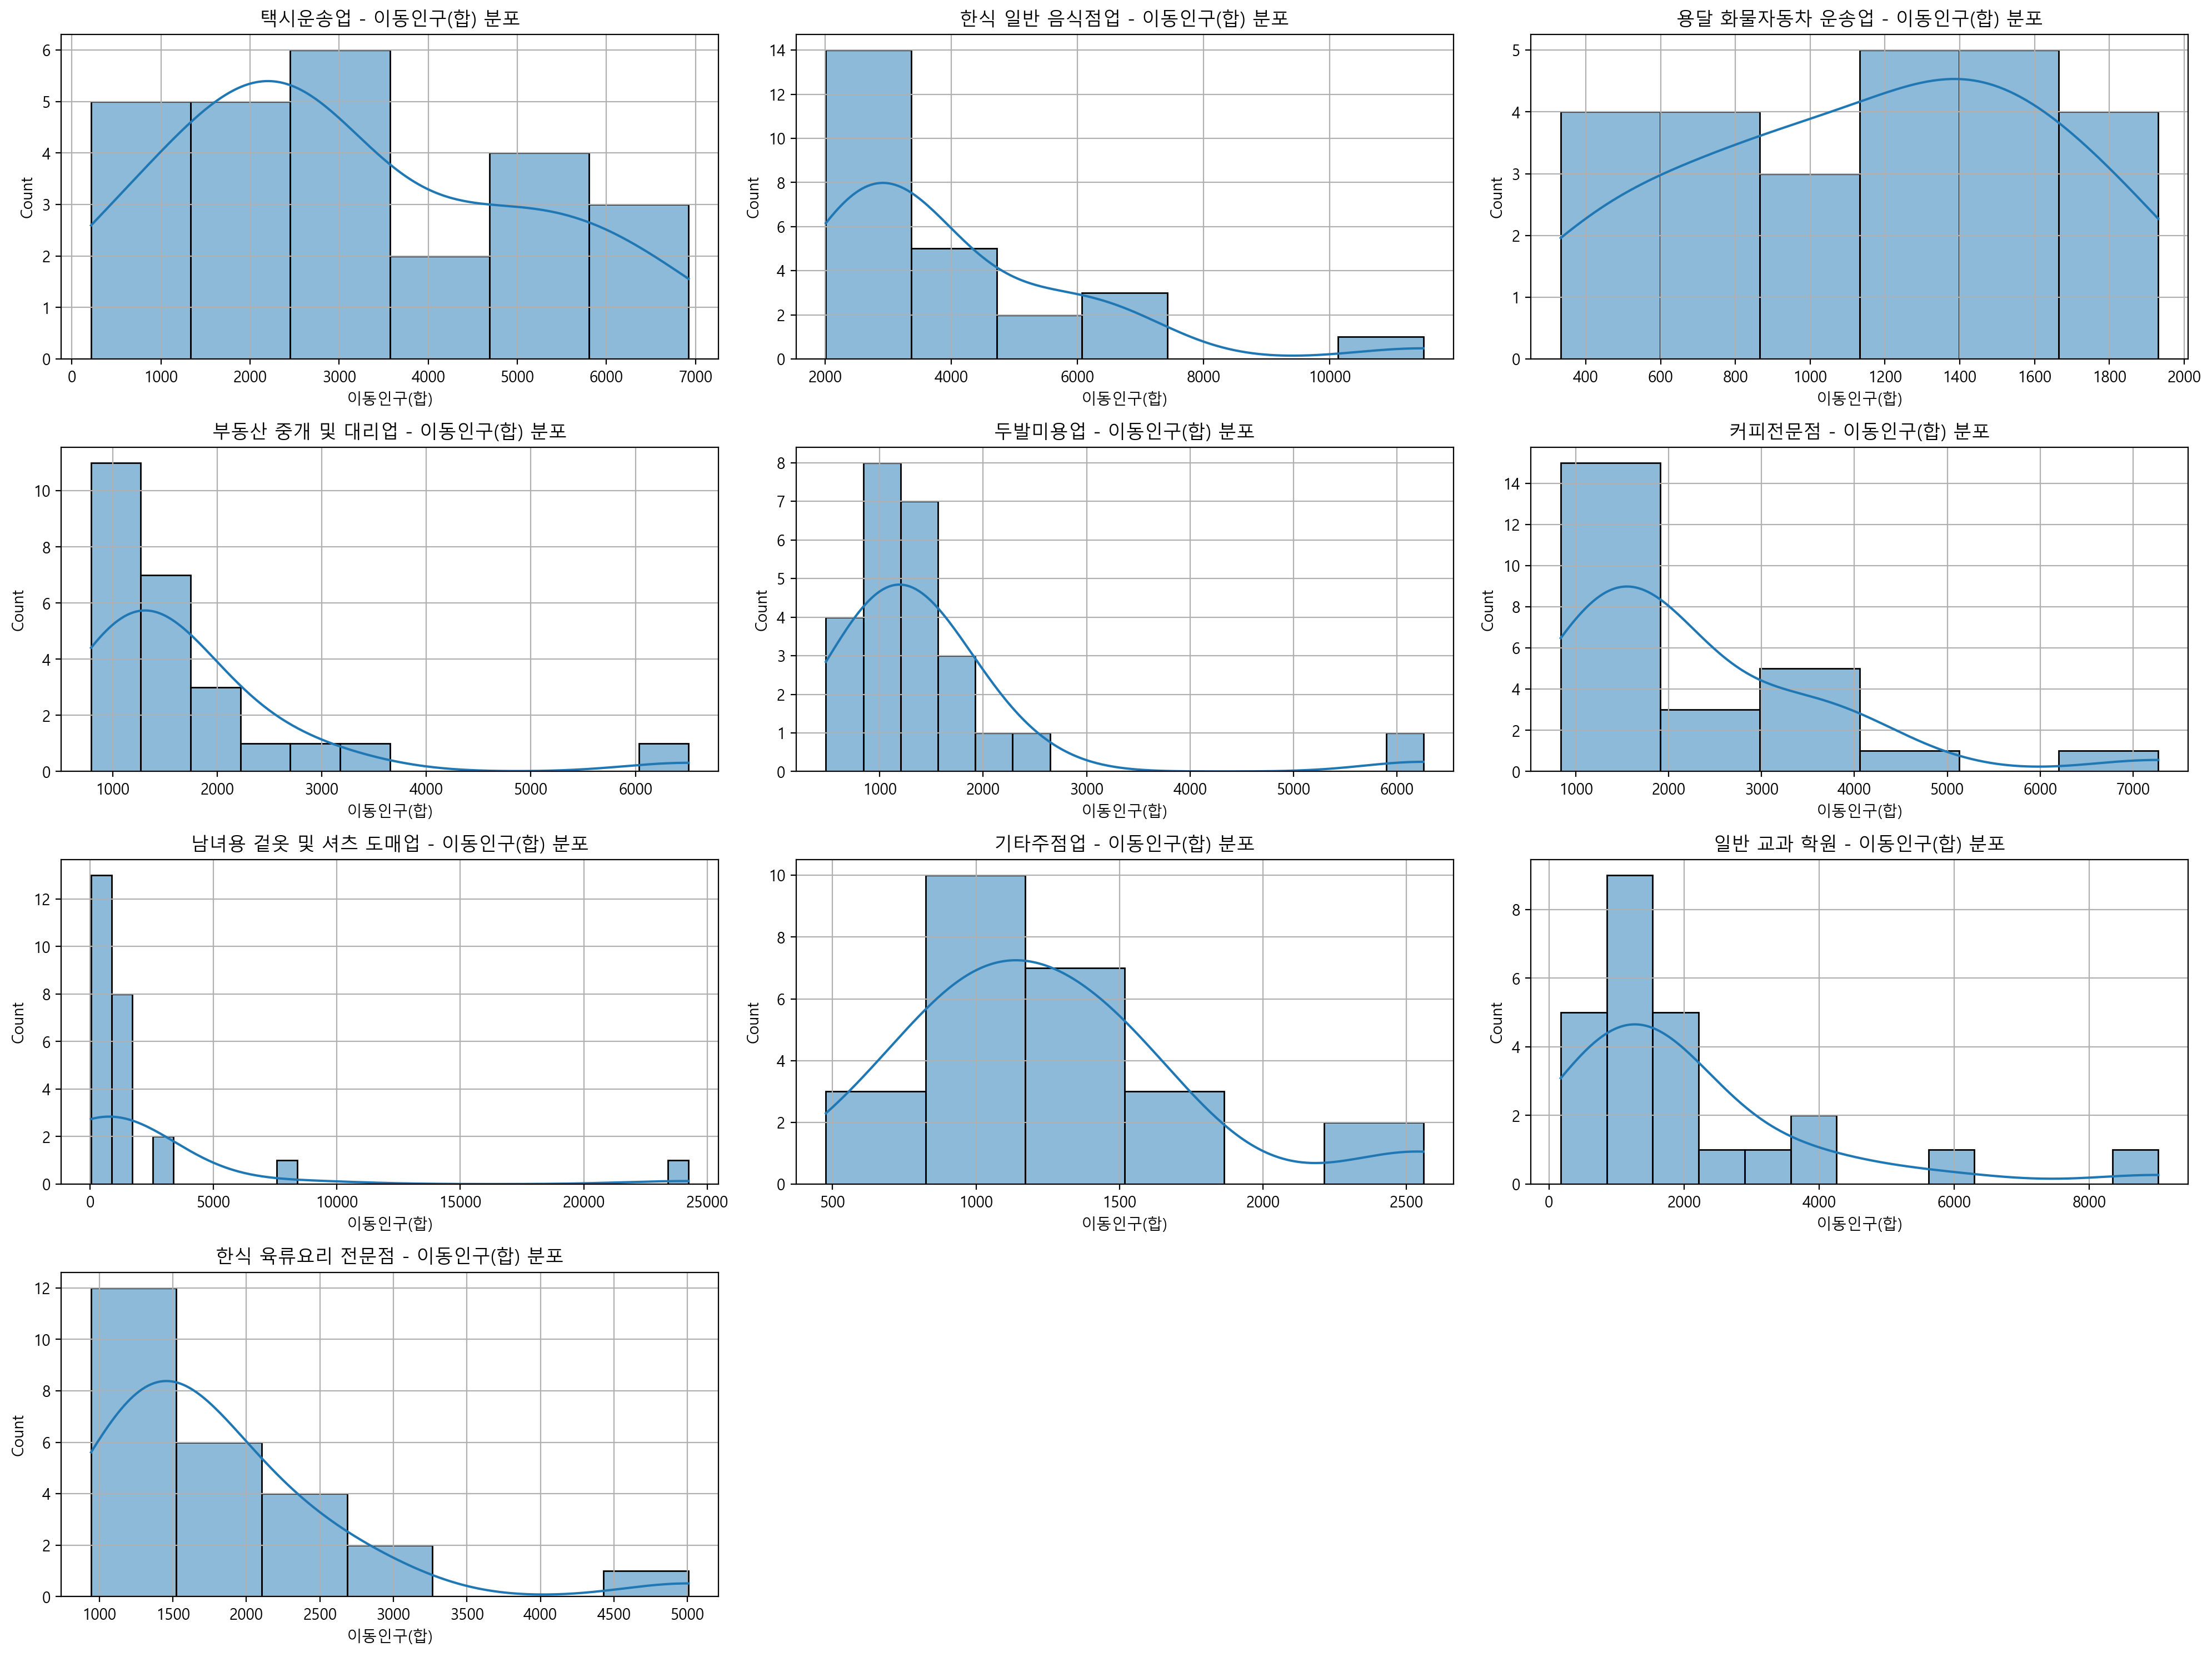

In [23]:
plt.figure(figsize=(20, 15))

unique_businesses = df3.columns[3:]  
rows = (len(unique_businesses) + 2) // 3  
cols = 3  

for i, business in enumerate(unique_businesses):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df3[business], kde=True)
    plt.title(f'{business} - 이동인구(합) 분포')
    plt.xlabel('이동인구(합)')
    plt.grid()

plt.tight_layout()
plt.show()

- 한식 일반 음식점업, 부동산 중개 및 대리업, 두발미용업, 커피전문점, 남녀용 겉옷 및 셔츠 도매업, 일반 교과 학원, 한식 육류요리 전문점 우측 왜도 
- 용달화물차운송업은 좌측 왜도
- 택시 운송업, 기타주점 애매한 우측 왜도

### 4)

In [24]:
df4 = df[['자치구', '총 이동인구', '정류장수']]
df4.head()

,자치구,총 이동인구,정류장수
0,강남구,51766253.76,502
1,강동구,25664489.79,376
2,강북구,14200518.80,410
3,강서구,26137612.75,565
4,관악구,21022812.01,465


In [25]:
print(df4.isnull().sum())
print(df4.describe())

자치구       0
총 이동인구    0
정류장수      0
dtype: int64
             총 이동인구       정류장수
count  2.500000e+01   25.00000
mean   2.219275e+07  426.60000
std    8.977380e+06  104.68365
min    9.314768e+06  172.00000
25%    1.775526e+07  359.00000
50%    1.965211e+07  435.00000
75%    2.566449e+07  494.00000
max    5.176625e+07  602.00000


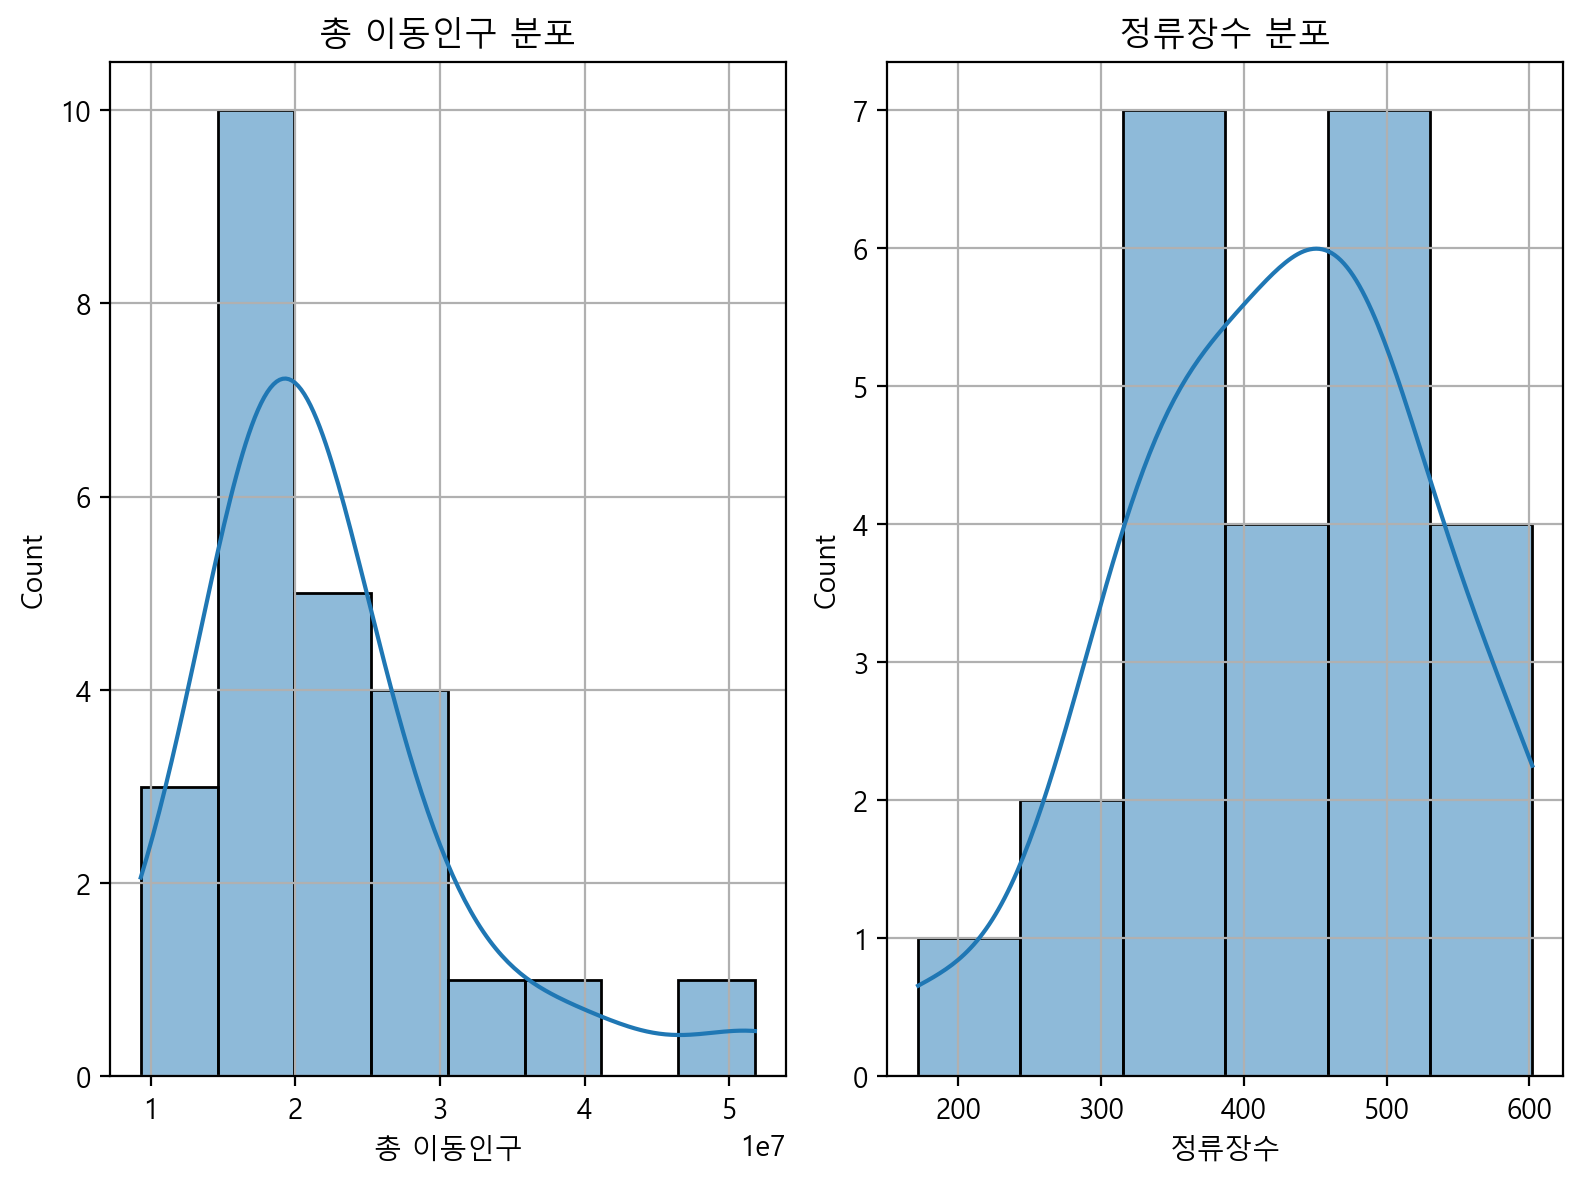

In [26]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.histplot(df4['총 이동인구'], kde=True)
plt.title('총 이동인구 분포')
plt.grid()

plt.subplot(1, 2, 2)
sns.histplot(df4['정류장수'], kde=True)
plt.title('정류장수 분포')
plt.grid()

plt.tight_layout()
plt.show()

- 총이동인구는 우측 왜도
- 정류장수는 좌측 왜도

### 5)

In [27]:
size = pd.read_csv('구별 행정구역.txt', sep='\t')
size.drop(columns={'자치구별(1)','2022.1', '2022.2','2022.3', '2022.4', '2022.5'}, inplace=True)
size = size[3:]
size.reset_index(drop=True)
size.rename(columns={'자치구별(2)': '자치구', '2022': '면적'}, inplace=True)

In [28]:
size.head()

,자치구,면적
3,종로구,23.91
4,중구,9.96
5,용산구,21.87
6,성동구,16.82
7,광진구,17.06


In [29]:
df = pd.merge(df, size, how='inner', on='자치구')
df.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,택시운송업,한식 일반 음식점업,용달 화물자동차 운송업,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점,남자,여자,합계,승하차 총승객수,승하차 평균승객수,면적
0,강남구,502,99,9113021,8640353,135.163908,128.153318,65.220874,89.880083,37563832,51766253.76,2517,11486,487,6508,6255,7273,8320,2528,9020,5008,268993,293762,562755,17753374,263.317226,39.50
1,강동구,376,24,3306588,3242901,94.638885,92.816079,71.135695,67.088111,27212889,25664489.79,4980,3388,1566,1990,1429,1660,1433,1349,2104,1459,228197,239705,467902,6549489,187.454964,24.59
2,강북구,410,71,5244436,5077041,138.244306,133.831743,65.258796,38.290780,24201877,14200518.80,2589,2663,1030,867,997,1095,94,1275,740,1176,139260,150567,289827,10321477,272.076049,23.60
3,강서구,565,54,5244615,5218001,93.106837,92.634362,70.107829,59.547527,30772920,26137612.75,6922,4584,1862,2352,1751,2530,700,1709,2347,2274,270025,294460,564485,10462616,185.741199,41.45
4,관악구,465,82,7691243,7850254,147.777793,150.832994,63.064536,47.985346,27629141,21022812.01,2027,3689,1600,2136,1604,2049,190,1672,1230,1628,248571,248566,497137,15541497,298.610787,29.57


In [30]:
df5 = df[['자치구','평균 이동 시간(분)','면적']]
df5

,자치구,평균 이동 시간(분),면적
0,강남구,65.220874,39.50
1,강동구,71.135695,24.59
2,강북구,65.258796,23.60
3,강서구,70.107829,41.45
4,관악구,63.064536,29.57
5,광진구,60.205262,17.06
6,구로구,63.983186,20.12
7,금천구,65.848807,13.02
8,노원구,66.705984,35.44
9,도봉구,66.683308,20.65


In [31]:
df5['면적'] = df5['면적'].astype(float)
df5.dtypes

자치구             object
평균 이동 시간(분)    float64
면적             float64
dtype: object

In [32]:
print(df5.isnull().sum())
print(df5.describe())

자치구            0
평균 이동 시간(분)    0
면적             0
dtype: int64
       평균 이동 시간(분)         면적
count    25.000000  25.000000
mean     62.947805  24.208800
std       4.293887   9.311872
min      56.495425   9.960000
25%      59.917230  17.410000
50%      62.806200  23.600000
75%      65.848807  29.570000
max      71.135695  46.970000


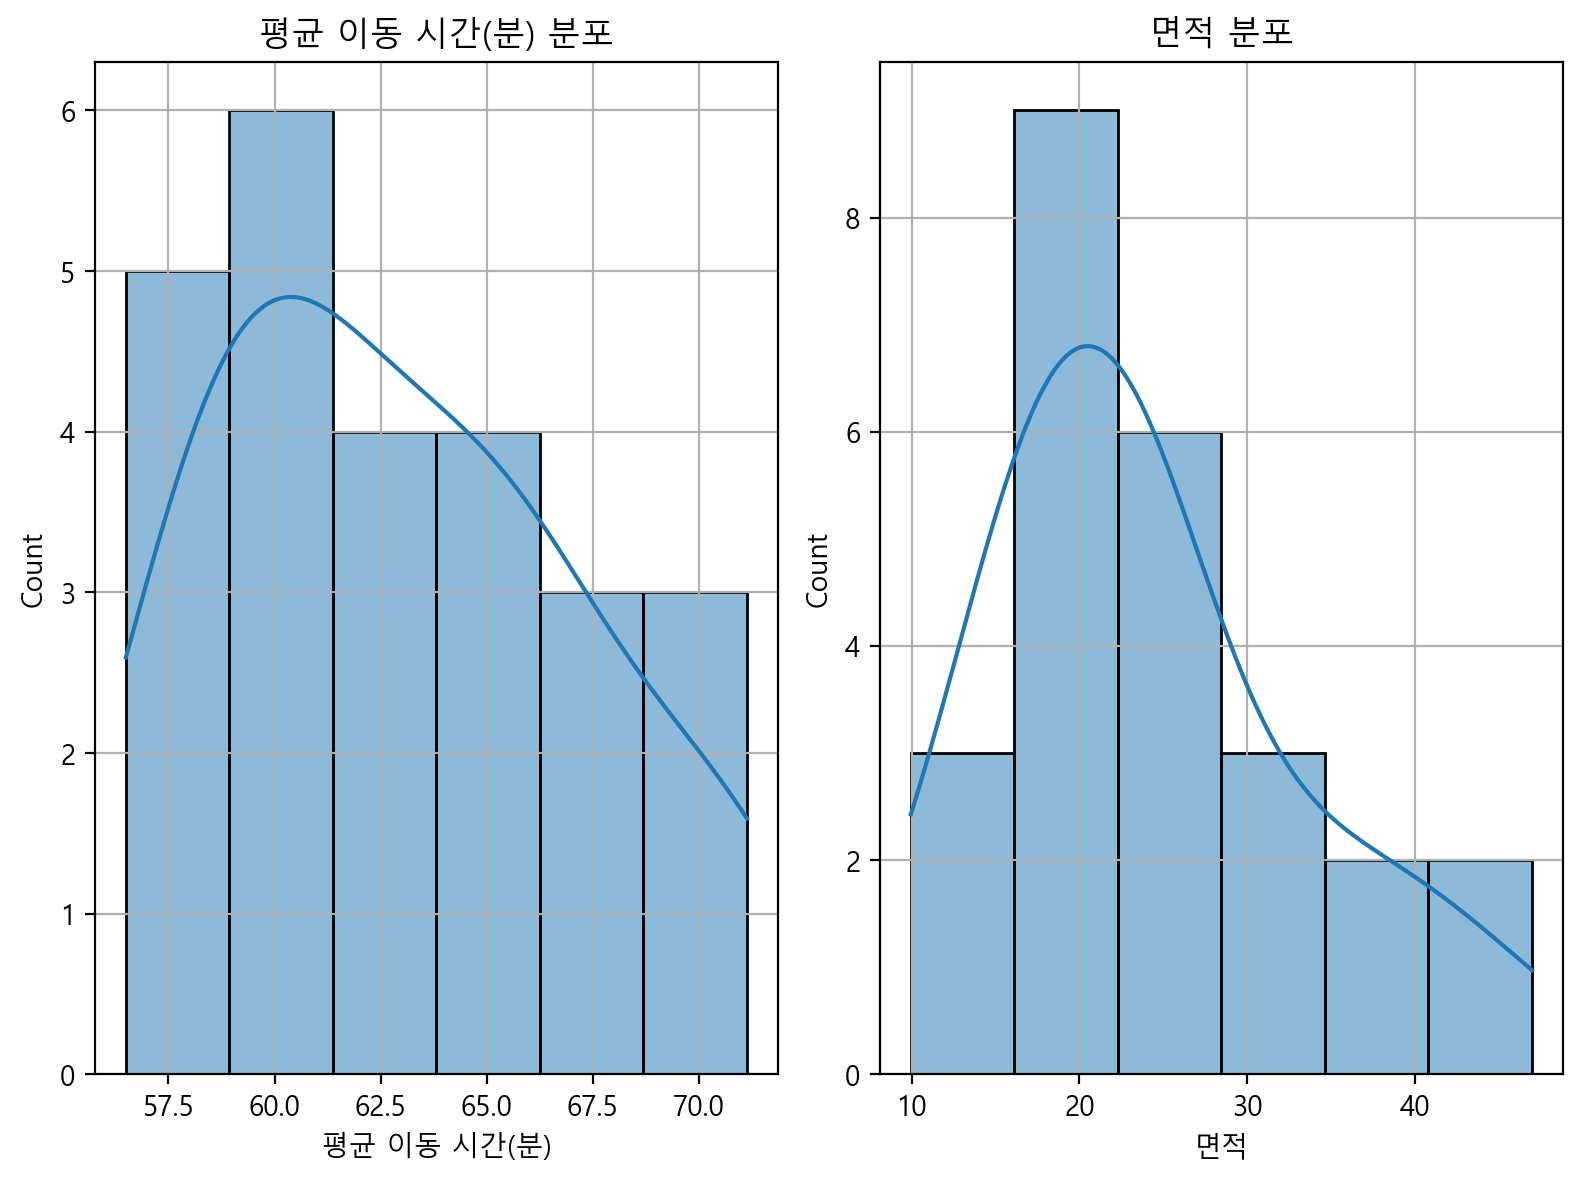

In [33]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.histplot(df5['평균 이동 시간(분)'], kde=True)
plt.title('평균 이동 시간(분) 분포')
plt.grid()

plt.subplot(1, 2, 2)
sns.histplot(df5['면적'], kde=True)
plt.title('면적 분포')
plt.grid()

plt.tight_layout()
plt.show()

- 평균 이동 시간과 면적은 우측 왜도를 가짐

### 6)

In [34]:
df.columns

Index(['자치구', '정류장수', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수',
       '평균 이동 시간(분)', '이동인구(합)', '총 이동 시간', '총 이동인구', '택시운송업', '한식 일반 음식점업',
       '용달 화물자동차 운송업', '부동산 중개 및 대리업', '두발미용업', '커피전문점', '남녀용 겉옷 및 셔츠 도매업',
       '기타주점업', '일반 교과 학원', '한식 육류요리 전문점', '남자', '여자', '합계', '승하차 총승객수',
       '승하차 평균승객수', '면적'],
      dtype='object')

In [35]:
df6 = df[['자치구', '정류장수', '노선수', '한식 일반 음식점업', '커피전문점', '기타주점업', '한식 육류요리 전문점', '면적']]
df6.head()

,자치구,정류장수,노선수,한식 일반 음식점업,커피전문점,기타주점업,한식 육류요리 전문점,면적
0,강남구,502,99,11486,7273,2528,5008,39.50
1,강동구,376,24,3388,1660,1349,1459,24.59
2,강북구,410,71,2663,1095,1275,1176,23.60
3,강서구,565,54,4584,2530,1709,2274,41.45
4,관악구,465,82,3689,2049,1672,1628,29.57


In [36]:
df6['면적'] = df6['면적'].astype(float)
df6.dtypes

자치구             object
정류장수             int64
노선수              int64
한식 일반 음식점업       int64
커피전문점            int64
기타주점업            int64
한식 육류요리 전문점      int64
면적             float64
dtype: object

In [37]:
print(df6.isnull().sum())
print(df6.describe())

자치구            0
정류장수           0
노선수            0
한식 일반 음식점업     0
커피전문점          0
기타주점업          0
한식 육류요리 전문점    0
면적             0
dtype: int64
            정류장수         노선수   한식 일반 음식점업        커피전문점        기타주점업  \
count   25.00000   25.000000     25.00000    25.000000    25.000000   
mean   426.60000   75.840000   4007.32000  2292.880000  1254.840000   
std    104.68365   23.487018   2132.72849  1452.869383   502.206936   
min    172.00000   24.000000   2009.00000   837.000000   477.000000   
25%    359.00000   57.000000   2663.00000  1375.000000   955.000000   
50%    435.00000   75.000000   2987.00000  1748.000000  1165.000000   
75%    494.00000  100.000000   4705.00000  3295.000000  1469.000000   
max    602.00000  109.000000  11486.00000  7273.000000  2559.000000   

       한식 육류요리 전문점         면적  
count    25.000000  25.000000  
mean   1786.120000  24.208800  
std     854.764359   9.311872  
min     943.000000   9.960000  
25%    1184.000000  17.410000  
50%    1545.000000 

In [38]:
df6['음식점'] = df6['한식 일반 음식점업']+df6['커피전문점']+df6['기타주점업']+df6['한식 육류요리 전문점']
df6

,자치구,정류장수,노선수,한식 일반 음식점업,커피전문점,기타주점업,한식 육류요리 전문점,면적,음식점
0,강남구,502,99,11486,7273,2528,5008,39.50,26295
1,강동구,376,24,3388,1660,1349,1459,24.59,7856
2,강북구,410,71,2663,1095,1275,1176,23.60,6209
3,강서구,565,54,4584,2530,1709,2274,41.45,11097
4,관악구,465,82,3689,2049,1672,1628,29.57,9038
5,광진구,278,43,2861,1887,1577,1678,17.06,8003
6,구로구,478,81,3215,1384,1165,1496,20.12,7260
7,금천구,344,56,2619,1215,685,1042,13.02,5561
8,노원구,495,61,2650,1748,844,1557,35.44,6799
9,도봉구,366,57,2009,837,477,943,20.65,4266


- 가설 1~5 까지 사용한 변수를 제외한 노선수 히스토그램 시각화

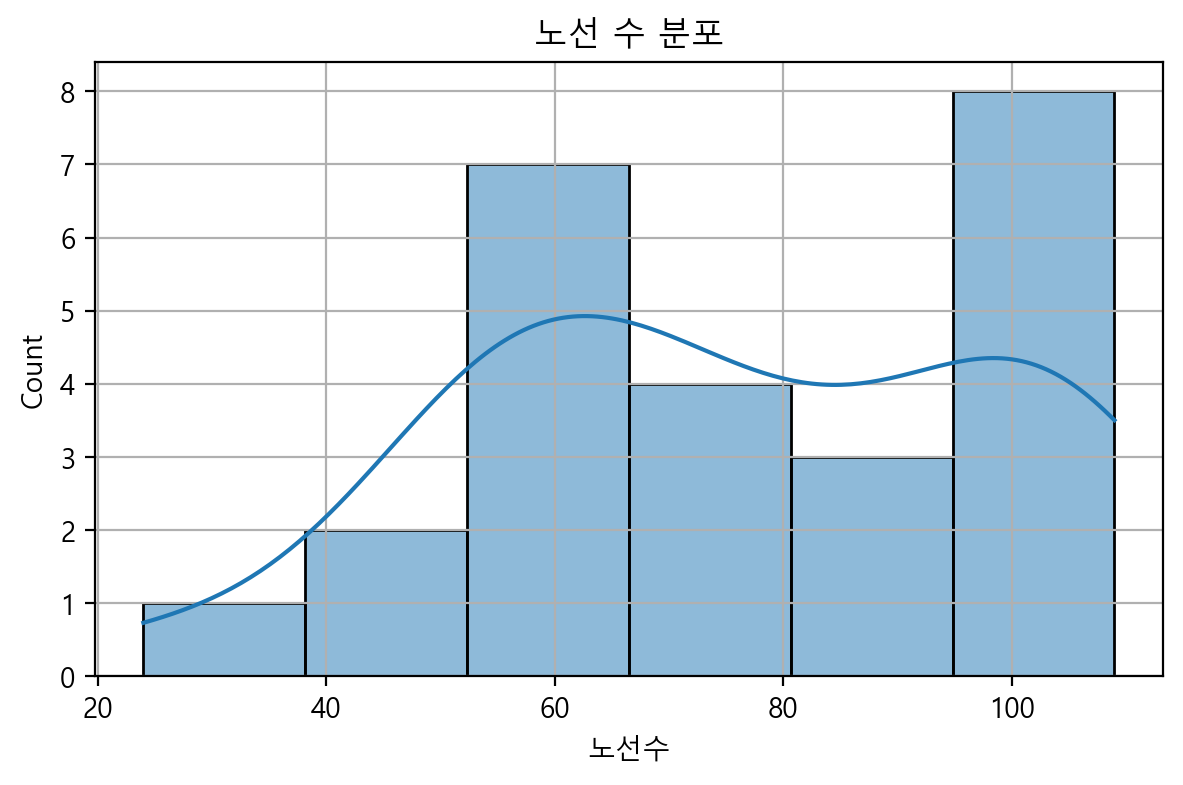

In [39]:
plt.figure(figsize=(6, 4))

sns.histplot(df6['노선수'], kde=True)
plt.title('노선 수 분포')
plt.grid()

plt.tight_layout()
plt.show()

- 전체적으로 노선 수가 60개에 몰려있다.

# 5.이변량 분석

### 1) 가설 1

In [40]:
df1.head()

,자치구,노선수,합계,승차총승객수,하차총승객수,한식 일반 음식점업,커피전문점,기타주점업,한식 육류요리 전문점
0,강남구,99,562755,9113021,8640353,11486,7273,2528,5008
1,강동구,24,467902,3306588,3242901,3388,1660,1349,1459
2,강북구,71,289827,5244436,5077041,2663,1095,1275,1176
3,강서구,54,564485,5244615,5218001,4584,2530,1709,2274
4,관악구,82,497137,7691243,7850254,3689,2049,1672,1628


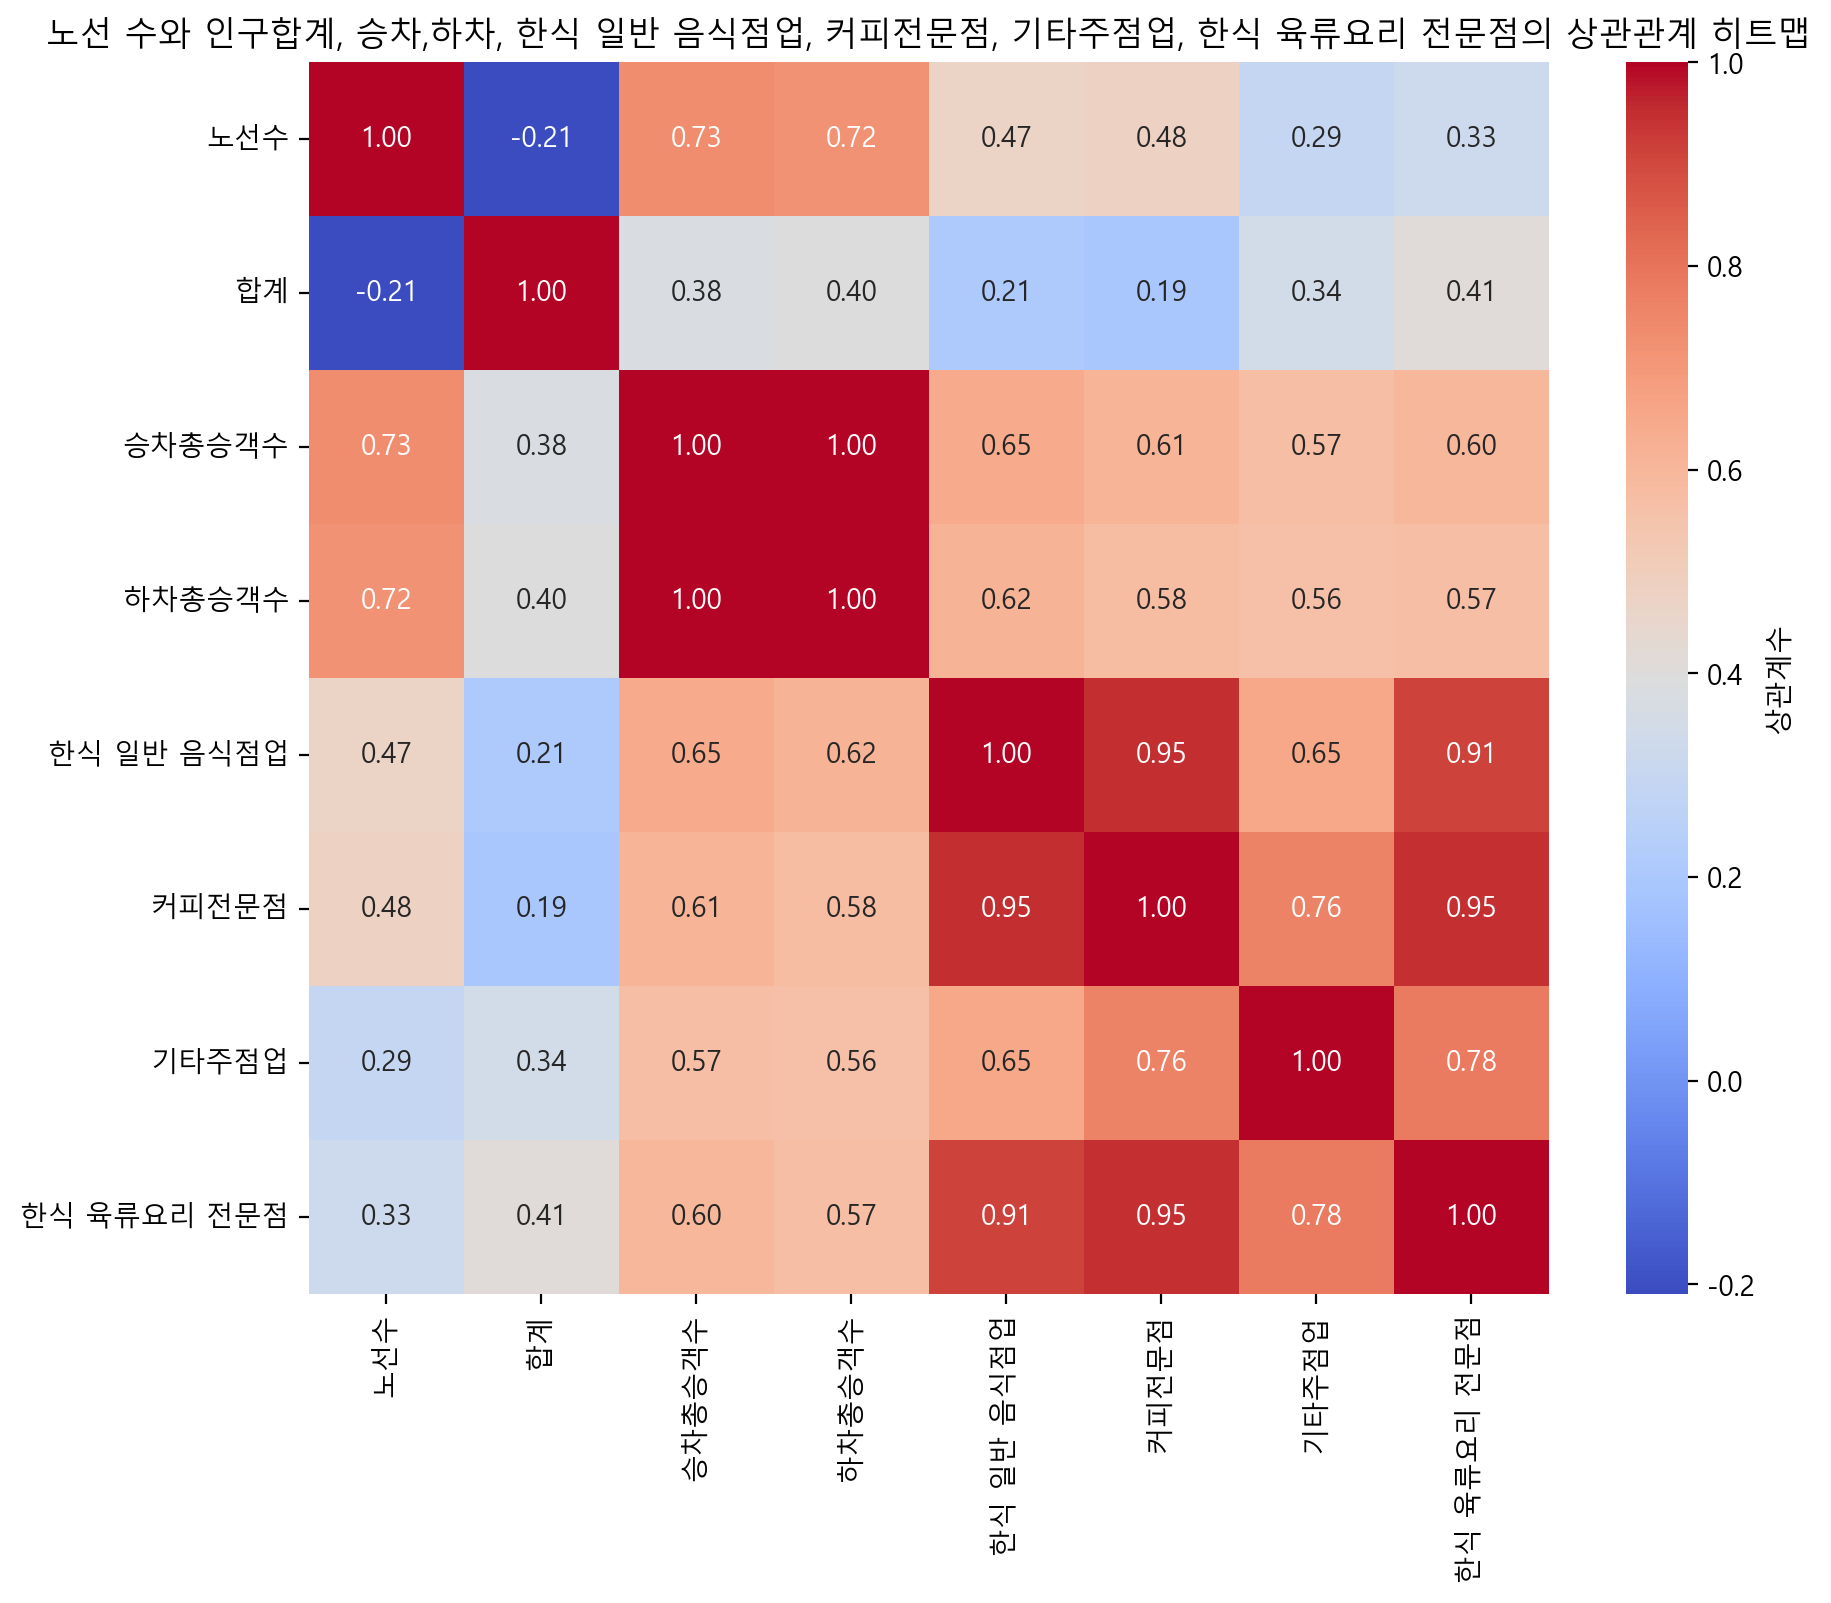

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': '상관계수'})

plt.title('노선 수와 인구합계, 승차,하차, 한식 일반 음식점업, 커피전문점, 기타주점업, 한식 육류요리 전문점의 상관관계 히트맵')
plt.show()

In [42]:
# 주석
print('노선 수와 인구 합: ', spst.pearsonr(df1['노선수'], df1['합계']))
print('노선 수와 승차총승객수: ', spst.pearsonr(df1['노선수'], df1['승차총승객수']))
print('노선 수와 하차총승객수: ', spst.pearsonr(df1['노선수'], df1['하차총승객수']))
print('노선 수와 한식 일반 음식점업: ', spst.pearsonr(df1['노선수'], df1['한식 일반 음식점업']))
print('노선 수와 커피전문점: ', spst.pearsonr(df1['노선수'], df1['커피전문점']))
print('노선 수와 기타주점업: ', spst.pearsonr(df1['노선수'], df1['기타주점업']))
print('노선 수와 한식 육류요리 전문점: ', spst.pearsonr(df1['노선수'], df1['한식 육류요리 전문점']))

노선 수와 인구 합:  (-0.20995834421299855, 0.3137753322677251)
노선 수와 승차총승객수:  (0.7307052559619787, 3.355022984497188e-05)
노선 수와 하차총승객수:  (0.7187990183840054, 5.169948894248798e-05)
노선 수와 한식 일반 음식점업:  (0.46647305758934, 0.018746187616928412)
노선 수와 커피전문점:  (0.4809023654757555, 0.014952138163318477)
노선 수와 기타주점업:  (0.29333030927471393, 0.1547093135774137)
노선 수와 한식 육류요리 전문점:  (0.3282205504052191, 0.10919471711710753)


- 노선 수와 인구 합:  (-0.20995834421299855, 0.3137753322677251) 인구 수와 노선 수는 비례하지 않는다. 가설 기각 
- 노선 수와 승차총승객수:  (0.7307052559619787, 3.355022984497188e-05) 승차 총 승객 수와 노선 수는 비례한다. 양의 강한 상관관계가 존재한다. 
- 노선 수와 하차총승객수:  (0.7187990183840054, 5.169948894248798e-05) 하차 총 승객 수와 노선 수는 비례한다. 양의 강한 상관관계가 존재한다. 
- 노선 수와 한식 일반 음식점업:  (0.46647305758934, 0.018746187616928412) 노선 수와 한식 일반 음식점업은 비례한다. 양의 상관관계가 존재한다.  
- 노선 수와 커피전문점:  (0.4809023654757555, 0.014952138163318477) 노선 수와 커피 전문점은 비례한다. 양의 상관관계가 존재한다. 
- 노선 수와 기타주점업:  (0.29333030927471393, 0.1547093135774137) 노선 수와 기타주점업은 비례하지 않는다. 가설 기각 
- 노선 수와 한식 육류요리 전문점:  (0.3282205504052191, 0.10919471711710753) 노선 수와 한식 육류 요리 전문점은 비례하지 않는다. 가설 기각 
> 승하차 인구 수와 노선 수가 비례한다. 한식 일반 음식점, 커피 전문점과 노선 수는 비례한다. 

#### 승하차 인구수가 많은 자치구에 노선 수가 많은지, 한식 일반 음식점과 커피 전문점이 많은 자치구에 노선 수가 많은지 확인하는 과정이 필요  
- 10개 이상 노선 수 차이 나면 확충이 필요하다고 결론

In [43]:
df['승하차 총승객수'] = df['승차총승객수']+df['하차총승객수']
df.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,택시운송업,한식 일반 음식점업,용달 화물자동차 운송업,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점,남자,여자,합계,승하차 총승객수,승하차 평균승객수,면적
0,강남구,502,99,9113021,8640353,135.163908,128.153318,65.220874,89.880083,37563832,51766253.76,2517,11486,487,6508,6255,7273,8320,2528,9020,5008,268993,293762,562755,17753374,263.317226,39.50
1,강동구,376,24,3306588,3242901,94.638885,92.816079,71.135695,67.088111,27212889,25664489.79,4980,3388,1566,1990,1429,1660,1433,1349,2104,1459,228197,239705,467902,6549489,187.454964,24.59
2,강북구,410,71,5244436,5077041,138.244306,133.831743,65.258796,38.290780,24201877,14200518.80,2589,2663,1030,867,997,1095,94,1275,740,1176,139260,150567,289827,10321477,272.076049,23.60
3,강서구,565,54,5244615,5218001,93.106837,92.634362,70.107829,59.547527,30772920,26137612.75,6922,4584,1862,2352,1751,2530,700,1709,2347,2274,270025,294460,564485,10462616,185.741199,41.45
4,관악구,465,82,7691243,7850254,147.777793,150.832994,63.064536,47.985346,27629141,21022812.01,2027,3689,1600,2136,1604,2049,190,1672,1230,1628,248571,248566,497137,15541497,298.610787,29.57


In [44]:
df1 = df[['자치구', '노선수','승하차 총승객수']].sort_values(by = '승하차 총승객수', ascending = False)
df1.head()

,자치구,노선수,승하차 총승객수
0,강남구,99,17753374
4,관악구,82,15541497
14,서초구,105,15352041
16,성북구,100,13253246
13,서대문구,109,13190553


In [45]:
top_20_percent = df1.nlargest(int(len(df) * 0.2), '승하차 총승객수')

top_mean_routes = top_20_percent['노선수'].mean()
total_mean_routes = df1['노선수'].mean()

print(f"상위 20% 자치구의 평균 노선 수: {top_mean_routes}")
print(f"전체 자치구의 평균 노선 수: {total_mean_routes}")

상위 20% 자치구의 평균 노선 수: 99.0
전체 자치구의 평균 노선 수: 75.84


- 관악구에 노선 수 확충 필요 

In [46]:
df1 = df[['자치구', '노선수', '한식 일반 음식점업']].sort_values(by = '한식 일반 음식점업', ascending = False)
df1.head()

,자치구,노선수,한식 일반 음식점업
0,강남구,99,11486
14,서초구,105,6712
19,영등포구,101,6476
23,중구,102,6414
22,종로구,107,5912


In [47]:
top_20_percent = df1.nlargest(int(len(df) * 0.2), '한식 일반 음식점업')

top_mean_routes = top_20_percent['노선수'].mean()
total_mean_routes = df1['노선수'].mean()

print(f"상위 20% 자치구의 평균 노선 수: {top_mean_routes}")
print(f"전체 자치구의 평균 노선 수: {total_mean_routes}")

상위 20% 자치구의 평균 노선 수: 102.8
전체 자치구의 평균 노선 수: 75.84


In [48]:
df1 = df[['자치구', '노선수', '커피전문점']].sort_values(by = '커피전문점', ascending = False)
df1.head()

,자치구,노선수,커피전문점
0,강남구,99,7273
12,마포구,102,4475
14,서초구,105,3897
22,종로구,107,3613
23,중구,102,3542


In [49]:
top_20_percent = df1.nlargest(int(len(df) * 0.2), '커피전문점')

top_mean_routes = top_20_percent['노선수'].mean()
total_mean_routes = df1['노선수'].mean()

print(f"상위 20% 자치구의 평균 노선 수: {top_mean_routes}")
print(f"전체 자치구의 평균 노선 수: {total_mean_routes}")

상위 20% 자치구의 평균 노선 수: 103.0
전체 자치구의 평균 노선 수: 75.84


- 강남구에 한식 일반, 커피 전문점이 많지만 노선수가 상위 20 % 평균과 많은 차이가 나지 않기에 확충 필요 없다고 판단. 

> 최종 결론: 관악구에 노선 확충 필요

### 2) 가설 2

In [50]:
df2.head()

,자치구,평균 이동 시간(분),승하차 총승객수
0,강남구,65.220874,17753374
1,강동구,71.135695,6549489
2,강북구,65.258796,10321477
3,강서구,70.107829,10462616
4,관악구,63.064536,15541497


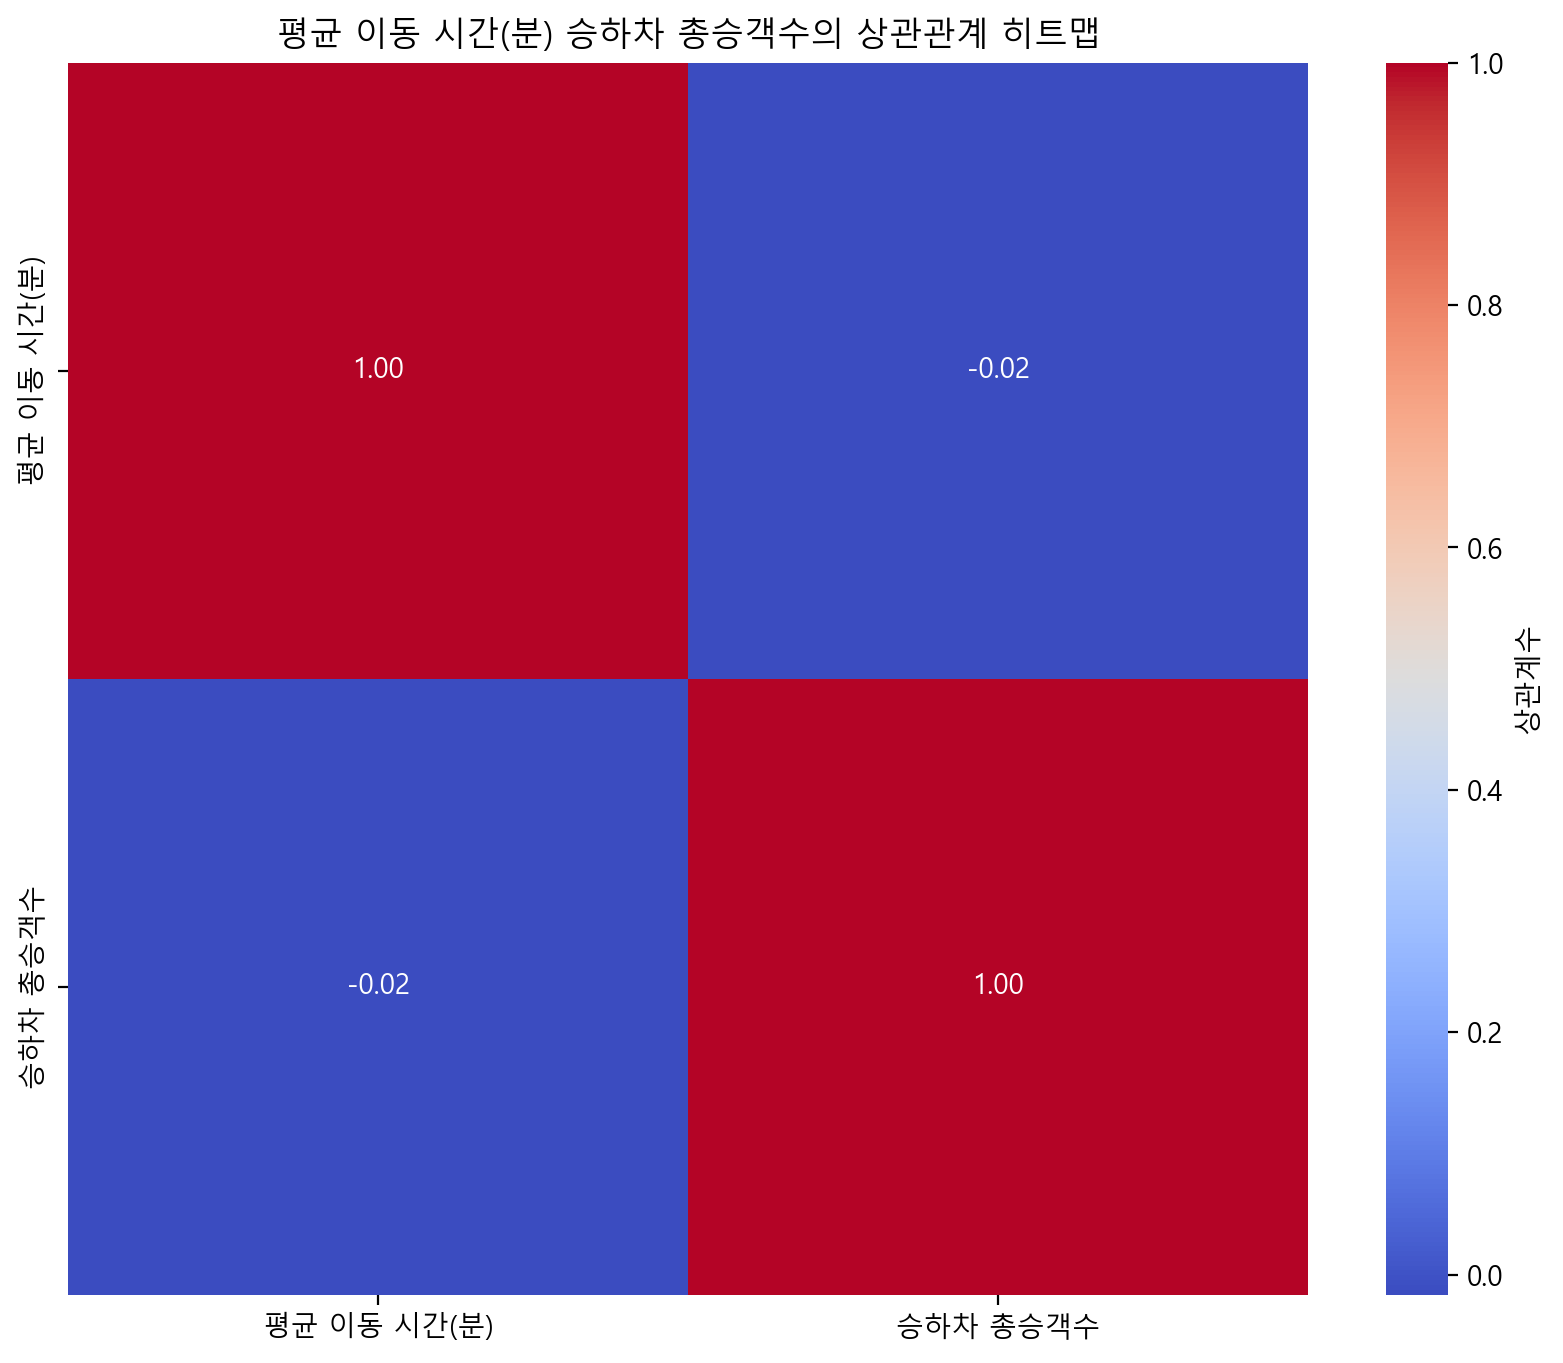

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': '상관계수'})

plt.title('평균 이동 시간(분) 승하차 총승객수의 상관관계 히트맵')
plt.show()

In [52]:
print('평균 이동 시간(분), 승하차 총승객수: ', spst.pearsonr(df2['평균 이동 시간(분)'], df2['승하차 총승객수']))

평균 이동 시간(분), 승하차 총승객수:  (-0.016384651724119875, 0.9380396098878019)


- 평균 이동 시간(분) 승하차 총승객수:  (-0.016384651724119875, 0.9380396098878019) 유의확률 0.93 가설 기각
> 평균 이동 시간과 승하차 총승객수는 관계가 없다. 이 가설에 기반한 추가 분석은 유효하지 않을 것이라 예상되어 이후 분석 과정 생략.

### 3) 가설 3

In [53]:
df3.head()

,자치구,이동인구(합),승하차 평균승객수,택시운송업,한식 일반 음식점업,용달 화물자동차 운송업,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점
0,강남구,89.880083,263.317226,2517,11486,487,6508,6255,7273,8320,2528,9020,5008
1,강동구,67.088111,187.454964,4980,3388,1566,1990,1429,1660,1433,1349,2104,1459
2,강북구,38.290780,272.076049,2589,2663,1030,867,997,1095,94,1275,740,1176
3,강서구,59.547527,185.741199,6922,4584,1862,2352,1751,2530,700,1709,2347,2274
4,관악구,47.985346,298.610787,2027,3689,1600,2136,1604,2049,190,1672,1230,1628


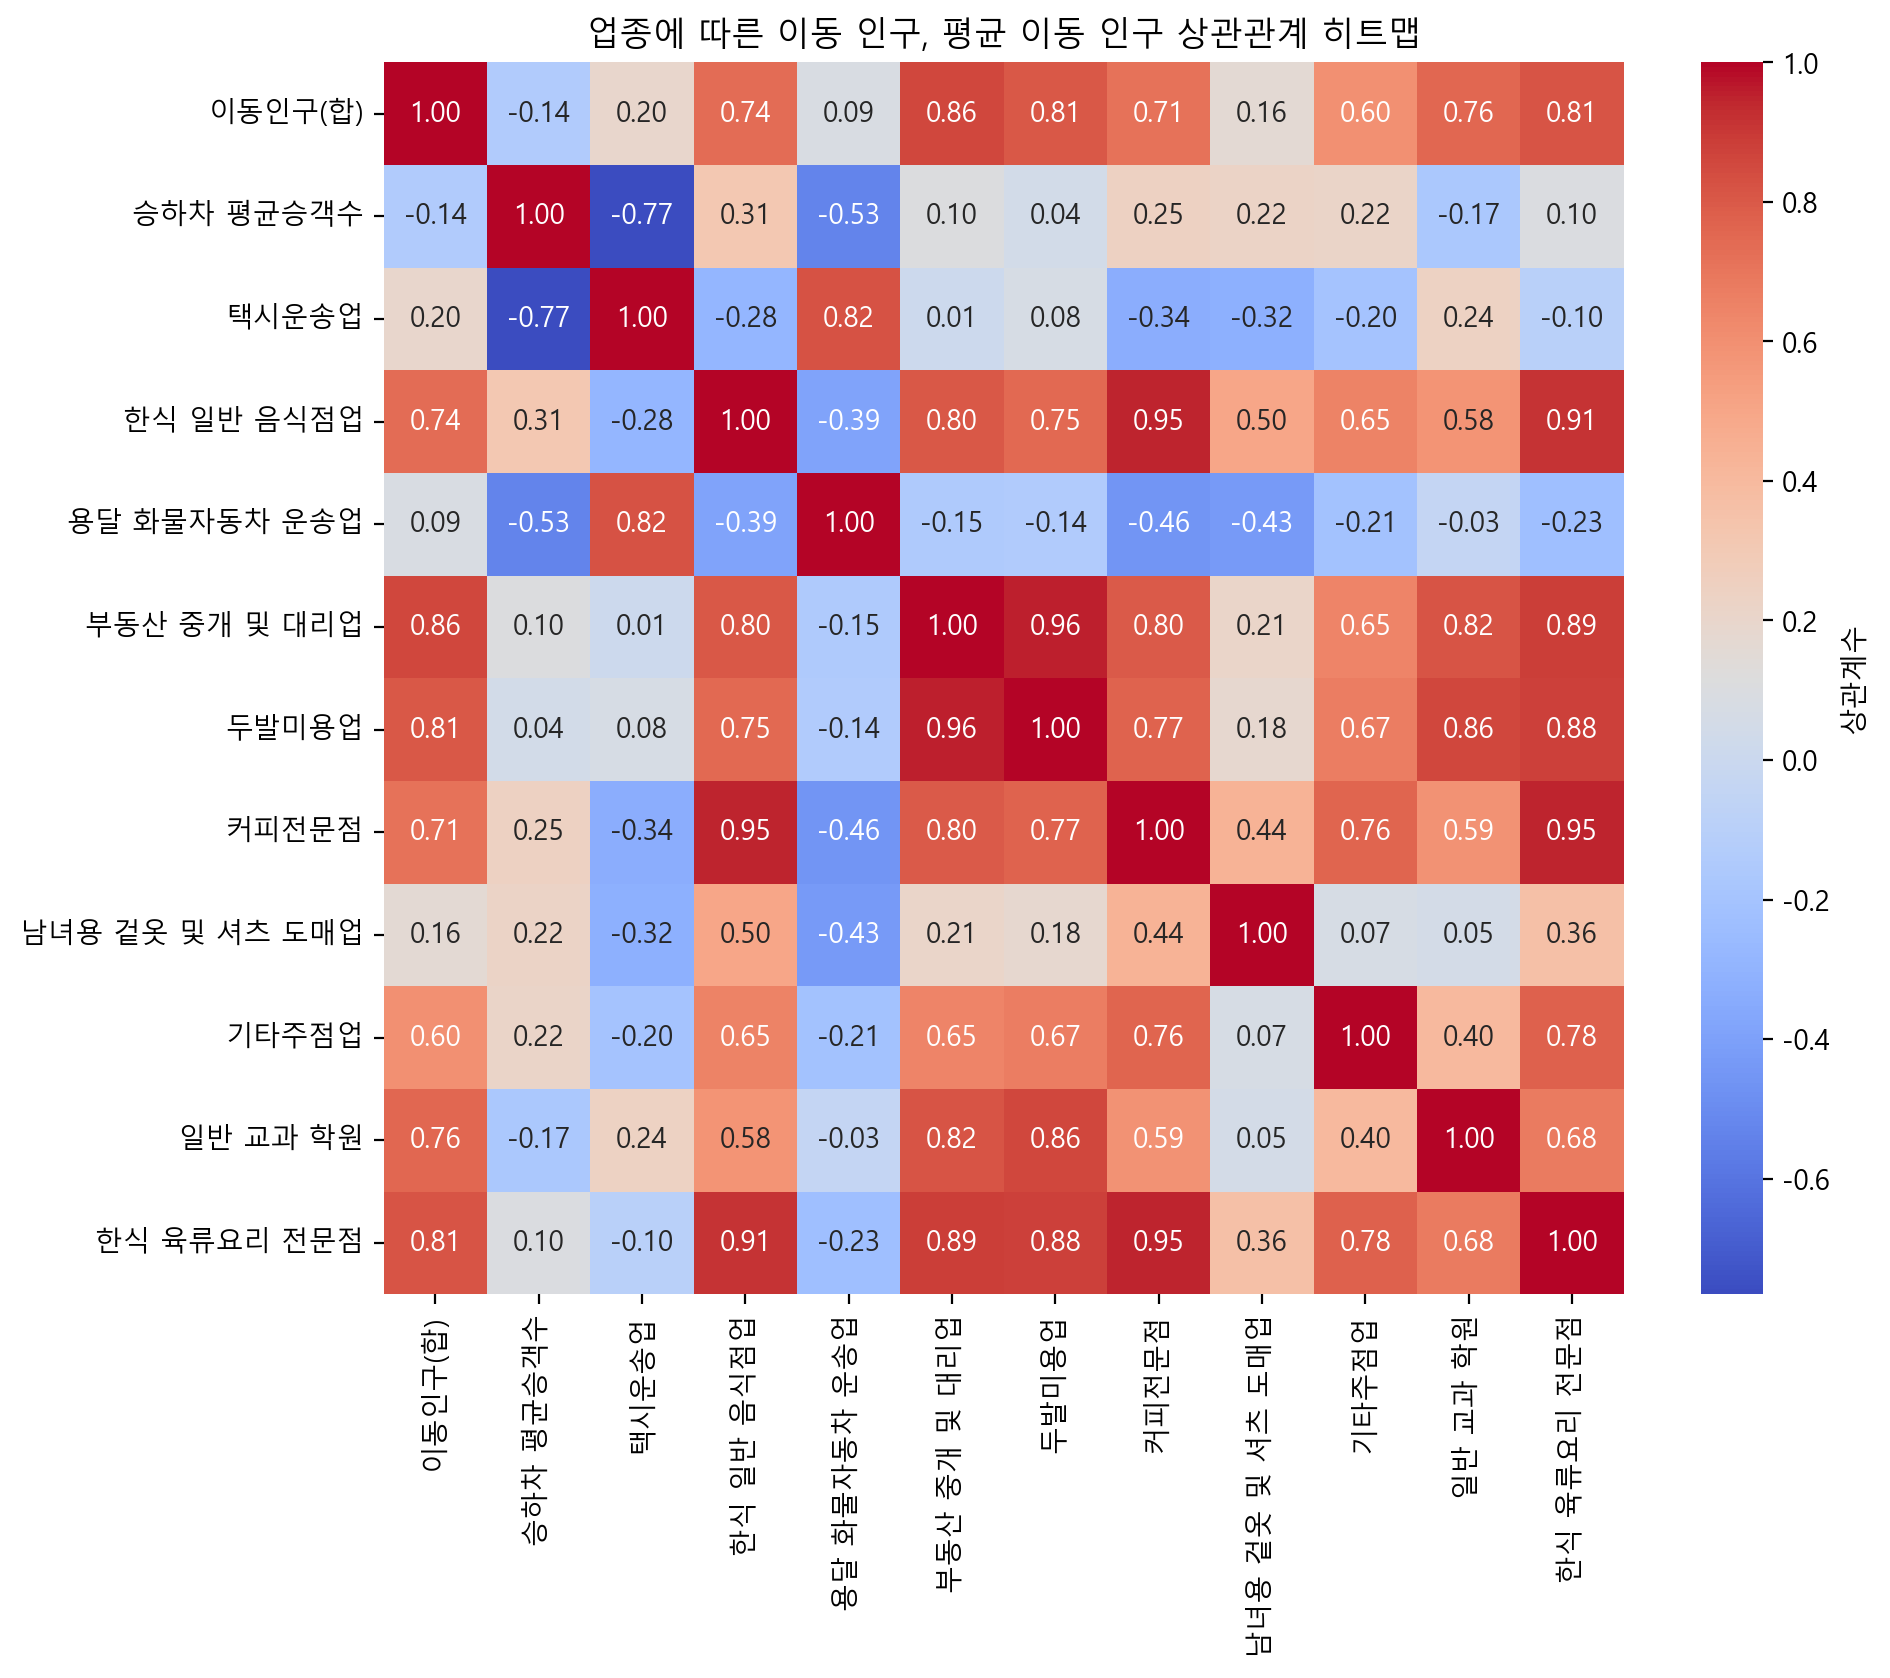

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': '상관계수'})

plt.title('업종에 따른 이동 인구, 평균 이동 인구 상관관계 히트맵')
plt.show()

In [55]:
df3.corr()

,이동인구(합),승하차 평균승객수,택시운송업,한식 일반 음식점업,용달 화물자동차 운송업,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점
이동인구(합),1.000000,-0.138564,0.199444,0.737657,0.089258,0.855268,0.805559,0.714513,0.163404,0.599446,0.758079,0.814726
승하차 평균승객수,-0.138564,1.000000,-0.765727,0.312674,-0.533186,0.103728,0.044025,0.246464,0.223700,0.217306,-0.166674,0.098991
택시운송업,0.199444,-0.765727,1.000000,-0.284810,0.824594,0.008479,0.075144,-0.337303,-0.321387,-0.203700,0.236963,-0.102389
한식 일반 음식점업,0.737657,0.312674,-0.284810,1.000000,-0.386647,0.804953,0.751589,0.948958,0.496942,0.651094,0.584375,0.912234
용달 화물자동차 운송업,0.089258,-0.533186,0.824594,-0.386647,1.000000,-0.149783,-0.138148,-0.456536,-0.434651,-0.209955,-0.034893,-0.229700
부동산 중개 및 대리업,0.855268,0.103728,0.008479,0.804953,-0.149783,1.000000,0.955886,0.798252,0.213066,0.645625,0.819095,0.887334
두발미용업,0.805559,0.044025,0.075144,0.751589,-0.138148,0.955886,1.000000,0.766702,0.180062,0.674601,0.860951,0.878730
커피전문점,0.714513,0.246464,-0.337303,0.948958,-0.456536,0.798252,0.766702,1.000000,0.436134,0.760153,0.586462,0.945118
남녀용 겉옷 및 셔츠 도매업,0.163404,0.223700,-0.321387,0.496942,-0.434651,0.213066,0.180062,0.436134,1.000000,0.072314,0.049246,0.363872
기타주점업,0.599446,0.217306,-0.203700,0.651094,-0.209955,0.645625,0.674601,0.760153,0.072314,1.000000,0.402966,0.779228


In [56]:
print('이동인구(합), 택시운송업: ', spst.pearsonr(df3['이동인구(합)'], df3['택시운송업']))
print('이동인구(합), 한식 일반 음식점업: ', spst.pearsonr(df3['이동인구(합)'], df3['한식 일반 음식점업']))
print('이동인구(합), 용달 화물자동차 운송업: ', spst.pearsonr(df3['이동인구(합)'], df3['용달 화물자동차 운송업']))
print('이동인구(합), 부동산 중개 및 대리업: ', spst.pearsonr(df3['이동인구(합)'], df3['부동산 중개 및 대리업']))
print('이동인구(합), 두발미용업: ', spst.pearsonr(df3['이동인구(합)'], df3['두발미용업']))
print('이동인구(합), 커피전문점: ', spst.pearsonr(df3['이동인구(합)'], df3['커피전문점']))
print('이동인구(합), 남녀용 겉옷 및 셔츠 도매업: ', spst.pearsonr(df3['이동인구(합)'], df3['남녀용 겉옷 및 셔츠 도매업']))
print('이동인구(합), 일반 교과 학원: ', spst.pearsonr(df3['이동인구(합)'], df3['일반 교과 학원']))
print('이동인구(합), 기타주점업: ', spst.pearsonr(df3['이동인구(합)'], df3['기타주점업']))
print('이동인구(합), 한식 육류요리 전문점: ', spst.pearsonr(df3['이동인구(합)'], df3['한식 육류요리 전문점']))

이동인구(합), 택시운송업:  (0.19944379664686684, 0.33916574944389855)
이동인구(합), 한식 일반 음식점업:  (0.7376566847378266, 2.5794036919234065e-05)
이동인구(합), 용달 화물자동차 운송업:  (0.0892580661326483, 0.6713539100256289)
이동인구(합), 부동산 중개 및 대리업:  (0.8552684395493867, 5.1432055300148965e-08)
이동인구(합), 두발미용업:  (0.8055589123231222, 1.1840876834533296e-06)
이동인구(합), 커피전문점:  (0.7145131803921466, 6.009146790659688e-05)
이동인구(합), 남녀용 겉옷 및 셔츠 도매업:  (0.16340396747668698, 0.4351207819233156)
이동인구(합), 일반 교과 학원:  (0.7580790026927354, 1.1343524672706295e-05)
이동인구(합), 기타주점업:  (0.5994463763355145, 0.0015410907992519606)
이동인구(합), 한식 육류요리 전문점:  (0.8147257008165252, 7.13054022536941e-07)


- 이동인구(합), 택시운송업:  (0.19944379664686684, 0.33916574944389855) 가설 기각 
- 이동인구(합), 한식 일반 음식점업:  (0.7376566847378266, 2.5794036919234065e-05) 양의 강한 상관관계 존재 
- 이동인구(합), 용달 화물자동차 운송업:  (0.0892580661326483, 0.6713539100256289) 가설 기각 
- 이동인구(합), 부동산 중개 및 대리업:  (0.8552684395493867, 5.1432055300148965e-08) 양의 강한 상관관계 존재
- 이동인구(합), 두발미용업:  (0.8055589123231222, 1.1840876834533296e-06) 양의 강한 상관관계 존재 
- 이동인구(합), 커피전문점:  (0.7145131803921466, 6.009146790659688e-05) 양의 강한 상관관계 존재 
- 이동인구(합), 남녀용 겉옷 및 셔츠 도매업:  (0.16340396747668698, 0.4351207819233156) 가설 기각 
- 이동인구(합), 일반 교과 학원:  (0.7580790026927354, 1.1343524672706295e-05) 가설 기각 
- 이동인구(합), 기타주점업:  (0.5994463763355145, 0.0015410907992519606) 상관관계 존재 
- 이동인구(합), 한식 육류요리 전문점:  (0.8147257008165252, 7.13054022536941e-07) 양의 강한 상관관계 존재 

> 이동인구(합) 과 강한 상관관계를 보이는 한식 일반 음식점업, 부동산 중개 및 대리업, 두발미용업, 커피전문점, 한식 육류요리 전문점을 합하여 업종으로 묶고, 업종이 많은 순대로의 자치구 상위 20%를 선택한다. 이후 노선 수 평균, 상위20% 자치구 노선 수 평균을 비교하여 10개 이상의 노선 수가 차이 나는 자치구에 노선 확충이 필요함.

In [57]:
print('승하차 평균승객수, 택시운송업: ', spst.pearsonr(df3['승하차 평균승객수'], df3['택시운송업']))
print('승하차 평균승객수, 한식 일반 음식점업: ', spst.pearsonr(df3['승하차 평균승객수'], df3['한식 일반 음식점업']))
print('승하차 평균승객수, 용달 화물자동차 운송업: ', spst.pearsonr(df3['승하차 평균승객수'], df3['용달 화물자동차 운송업']))
print('승하차 평균승객수, 부동산 중개 및 대리업: ', spst.pearsonr(df3['승하차 평균승객수'], df3['부동산 중개 및 대리업']))
print('승하차 평균승객수, 두발미용업: ', spst.pearsonr(df3['승하차 평균승객수'], df3['두발미용업']))
print('승하차 평균승객수, 커피전문점: ', spst.pearsonr(df3['승하차 평균승객수'], df3['커피전문점']))
print('승하차 평균승객수, 남녀용 겉옷 및 셔츠 도매업: ', spst.pearsonr(df3['승하차 평균승객수'], df3['남녀용 겉옷 및 셔츠 도매업']))
print('승하차 평균승객수, 일반 교과 학원: ', spst.pearsonr(df3['승하차 평균승객수'], df3['일반 교과 학원']))
print('승하차 평균승객수, 기타주점업: ', spst.pearsonr(df3['승하차 평균승객수'], df3['기타주점업']))
print('승하차 평균승객수, 한식 육류요리 전문점: ', spst.pearsonr(df3['승하차 평균승객수'], df3['한식 육류요리 전문점']))

승하차 평균승객수, 택시운송업:  (-0.765726716092276, 8.1689578864451e-06)
승하차 평균승객수, 한식 일반 음식점업:  (0.31267385083658983, 0.12806410494229897)
승하차 평균승객수, 용달 화물자동차 운송업:  (-0.5331859486270676, 0.00606050476518028)
승하차 평균승객수, 부동산 중개 및 대리업:  (0.10372790849541891, 0.6217146546054633)
승하차 평균승객수, 두발미용업:  (0.04402467689031325, 0.8344835169896041)
승하차 평균승객수, 커피전문점:  (0.2464643032073096, 0.23496693416426165)
승하차 평균승객수, 남녀용 겉옷 및 셔츠 도매업:  (0.2236997222435346, 0.28240530234939515)
승하차 평균승객수, 일반 교과 학원:  (-0.16667416022553544, 0.42585832846006016)
승하차 평균승객수, 기타주점업:  (0.21730568737505543, 0.29674597970788585)
승하차 평균승객수, 한식 육류요리 전문점:  (0.09899100461829548, 0.6378018749449976)


- 승하차 평균승객수, 택시운송업:  (-0.765726716092276, 8.1689578864451e-06) 음의 강한 상관관계 
- 승하차 평균승객수, 한식 일반 음식점업:  (0.31267385083658983, 0.12806410494229897) 가설 기각 
- 승하차 평균승객수, 용달 화물자동차 운송업:  (-0.5331859486270676, 0.00606050476518028) 음의 상관관계 존재 
- 승하차 평균승객수, 부동산 중개 및 대리업:  (0.10372790849541891, 0.6217146546054633) 가설 기각 
- 승하차 평균승객수, 두발미용업:  (0.04402467689031325, 0.8344835169896041) 가설 기각 
- 승하차 평균승객수, 커피전문점:  (0.2464643032073096, 0.23496693416426165) 가설 기각 
- 승하차 평균승객수, 남녀용 겉옷 및 셔츠 도매업:  (0.2236997222435346, 0.28240530234939515) 가설 기각 
- 승하차 평균승객수, 일반 교과 학원:  (-0.16667416022553544, 0.42585832846006016) 가설 기각 
- 승하차 평균승객수, 기타주점업:  (0.21730568737505543, 0.29674597970788585) 가설 기각 
- 승하차 평균승객수, 한식 육류요리 전문점:  (0.09899100461829548, 0.6378018749449976) 가설 기각 

> 승하차 평균승객수 와 음의 상관관계가 보이는 택시운송업, 용달 화물자동차 운송업을 합하여 업종2로 묶고, 하위 자치구 20% 자치구 노선을 선택한다. 이후 노선 수 평균, 하위 20% 노선 수 평균을 비교하여 10개 이상의 노선 수가 차이 나는 자치구에 노선 확충이 필요함. 

- 이동인구 합과 강한 상관관계를 보이는 한식 일반 음식점업, 부동산 중개 및 대리업, 두발미용업, 커피전문점, 한식 육류요리 전문점 == 갯수를 합하여 업종으로 묶고, 많은 수대로 자치구를 sort. 상위 20% 선택
- 노선 수 평균 비교하여 평균 대비 10개 이상의 노선이 차이 나는 자치구에 노선 확충 필요함

In [58]:
df3['업종'] = df3['한식 일반 음식점업']+df3['부동산 중개 및 대리업']+df3['두발미용업']+df3['커피전문점']+df3['한식 육류요리 전문점']
df3

,자치구,이동인구(합),승하차 평균승객수,택시운송업,한식 일반 음식점업,용달 화물자동차 운송업,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점,업종
0,강남구,89.880083,263.317226,2517,11486,487,6508,6255,7273,8320,2528,9020,5008,36530
1,강동구,67.088111,187.454964,4980,3388,1566,1990,1429,1660,1433,1349,2104,1459,9926
2,강북구,38.290780,272.076049,2589,2663,1030,867,997,1095,94,1275,740,1176,6798
3,강서구,59.547527,185.741199,6922,4584,1862,2352,1751,2530,700,1709,2347,2274,13491
4,관악구,47.985346,298.610787,2027,3689,1600,2136,1604,2049,190,1672,1230,1628,11106
5,광진구,44.344913,238.291030,1744,2861,985,1313,1337,1887,687,1577,1646,1678,9076
6,구로구,43.321989,245.685574,3817,3215,1351,1213,1134,1384,923,1165,1111,1496,8442
7,금천구,30.799340,254.994789,2598,2619,997,1381,715,1215,2575,685,487,1042,6972
8,노원구,52.344090,176.049879,6074,2650,1736,1053,1353,1748,123,844,3281,1557,8361
9,도봉구,36.915026,218.603816,5783,2009,1574,794,847,837,43,477,1162,943,5430


In [59]:
df3_sorted = df3.sort_values(by='업종', ascending=False)

top_20_percent_count = int(len(df3_sorted) * 0.2)
top_20_percent = df3_sorted.head(top_20_percent_count)

In [60]:
top_20_percent['노선수'] = df['노선수']
top_20_percent[['자치구', '이동인구(합)','업종','노선수']].head()

,자치구,이동인구(합),업종,노선수
0,강남구,89.880083,36530,99
14,서초구,64.608088,17537,105
17,송파구,83.345366,17431,62
12,마포구,52.706976,16053,102
19,영등포구,55.985863,14749,101


In [61]:
top_20_percent[['자치구', '이동인구(합)','업종','노선수']]

,자치구,이동인구(합),업종,노선수
0,강남구,89.880083,36530,99
14,서초구,64.608088,17537,105
17,송파구,83.345366,17431,62
12,마포구,52.706976,16053,102
19,영등포구,55.985863,14749,101


In [62]:
total_mean_routes = df['노선수'].mean()  
top_mean_routes = top_20_percent['노선수'].mean()

print(f"상위 20% 자치구의 평균 노선 수: {top_mean_routes}")
print(f"전체 자치구의 평균 노선 수: {total_mean_routes}")

상위 20% 자치구의 평균 노선 수: 93.8
전체 자치구의 평균 노선 수: 75.84


> 송파구에 노선 수 확충 필요

In [63]:
df3['음의 업종'] = df3['택시운송업']+df3['용달 화물자동차 운송업']
df3

,자치구,이동인구(합),승하차 평균승객수,택시운송업,한식 일반 음식점업,용달 화물자동차 운송업,부동산 중개 및 대리업,두발미용업,커피전문점,남녀용 겉옷 및 셔츠 도매업,기타주점업,일반 교과 학원,한식 육류요리 전문점,업종,음의 업종
0,강남구,89.880083,263.317226,2517,11486,487,6508,6255,7273,8320,2528,9020,5008,36530,3004
1,강동구,67.088111,187.454964,4980,3388,1566,1990,1429,1660,1433,1349,2104,1459,9926,6546
2,강북구,38.290780,272.076049,2589,2663,1030,867,997,1095,94,1275,740,1176,6798,3619
3,강서구,59.547527,185.741199,6922,4584,1862,2352,1751,2530,700,1709,2347,2274,13491,8784
4,관악구,47.985346,298.610787,2027,3689,1600,2136,1604,2049,190,1672,1230,1628,11106,3627
5,광진구,44.344913,238.291030,1744,2861,985,1313,1337,1887,687,1577,1646,1678,9076,2729
6,구로구,43.321989,245.685574,3817,3215,1351,1213,1134,1384,923,1165,1111,1496,8442,5168
7,금천구,30.799340,254.994789,2598,2619,997,1381,715,1215,2575,685,487,1042,6972,3595
8,노원구,52.344090,176.049879,6074,2650,1736,1053,1353,1748,123,844,3281,1557,8361,7810
9,도봉구,36.915026,218.603816,5783,2009,1574,794,847,837,43,477,1162,943,5430,7357


In [64]:
df3_sorted = df3.sort_values(by='음의 업종', ascending=True)
top_20_percent_count = int(len(df3_sorted) * 0.2)
top_20_percent = df3_sorted.head(top_20_percent_count)
top_20_percent['노선수'] = df['노선수']
top_20_percent[['자치구', '승하차 평균승객수', '음의 업종', '노선수']]

,자치구,승하차 평균승객수,음의 업종,노선수
23,중구,259.990774,568,102
22,종로구,268.113215,861,107
20,용산구,269.278500,989,70
14,서초구,246.920594,1314,105
11,동작구,236.926495,1959,94


In [65]:
total_mean_routes = df['노선수'].mean()
print(f"전체 자치구의 평균 노선 수: {total_mean_routes:.2f}개")

top_20_mean_routes = top_20_percent['노선수'].mean()
print(f"하위 20% 자치구의 평균 노선 수: {top_20_mean_routes:.2f}개")

전체 자치구의 평균 노선 수: 75.84개
하위 20% 자치구의 평균 노선 수: 95.60개


> 용산구에 노선 수 확충 필요  

### 4) 가설 4

In [66]:
df4.corr()

,총 이동인구,정류장수
총 이동인구,1.000000,0.423217
정류장수,0.423217,1.000000


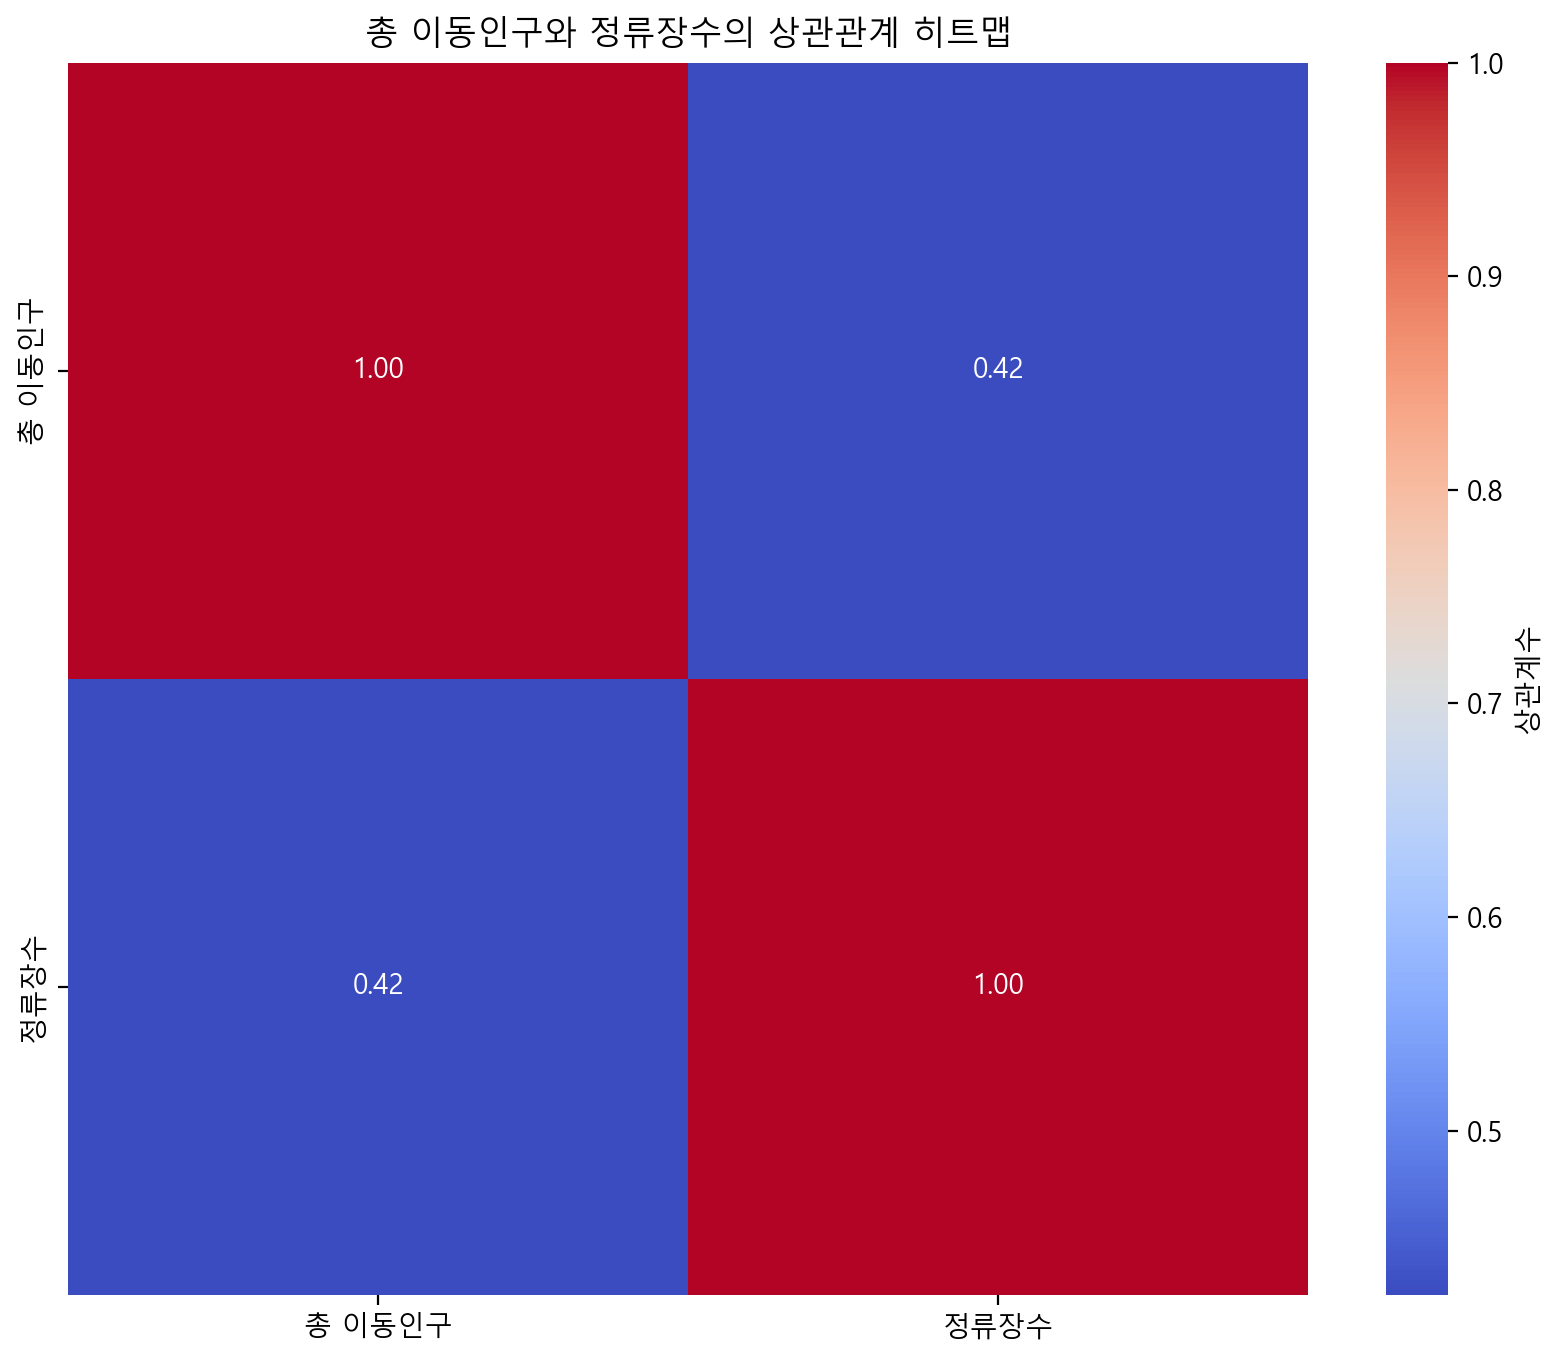

In [67]:
plt.figure(figsize=(10, 8))
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': '상관계수'})

plt.title('총 이동인구와 정류장수의 상관관계 히트맵')
plt.show()

In [68]:
print('총 이동인구와 정류장수: ', spst.pearsonr(df4['총 이동인구'], df4['정류장수']))

총 이동인구와 정류장수:  (0.42321745502526953, 0.03503359701355838)


> 양의 상관관계가 존재한다.

- 0.4 정도면 미미하기에 노선 수 추가 확충 필요 없을 수 있지만, 굳이 해본다면

In [69]:
df4['정류장 수 비율'] = (df4['정류장수'] / df4['총 이동인구']) * 1000
df4

,자치구,총 이동인구,정류장수,정류장 수 비율
0,강남구,51766253.76,502,0.009697
1,강동구,25664489.79,376,0.014651
2,강북구,14200518.80,410,0.028872
3,강서구,26137612.75,565,0.021616
4,관악구,21022812.01,465,0.022119
5,광진구,19652113.55,278,0.014146
6,구로구,17755257.26,478,0.026922
7,금천구,9314767.58,344,0.036931
8,노원구,22262150.94,495,0.022235
9,도봉구,12572999.34,366,0.029110


In [70]:
df4_sorted = df4.sort_values(by='정류장 수 비율', ascending=True)
df4_sorted

,자치구,총 이동인구,정류장수,정류장 수 비율
23,중구,22082840.96,172,0.007789
0,강남구,51766253.76,502,0.009697
17,송파구,40068617.94,476,0.011880
5,광진구,19652113.55,278,0.014146
1,강동구,25664489.79,376,0.014651
19,영등포구,28760273.86,466,0.016203
10,동대문구,18626135.28,309,0.016590
22,종로구,20717410.80,359,0.017328
14,서초구,33598983.96,602,0.017917
18,양천구,16548748.51,319,0.019276


In [71]:
top_20_percent_count = int(len(df4_sorted) * 0.2)
top_20_percent = df4_sorted.head(top_20_percent_count)
top_20_percent[['자치구', '정류장수', '정류장 수 비율']]

,자치구,정류장수,정류장 수 비율
23,중구,172,0.007789
0,강남구,502,0.009697
17,송파구,476,0.011880
5,광진구,278,0.014146
1,강동구,376,0.014651


In [72]:
top_20_mean_routes = top_20_percent['정류장 수 비율'].mean()
print(f"하위 20% 자치구의 평균 정류장 수 비율: {top_20_mean_routes:.2f}개")

하위 20% 자치구의 평균 정류장 수 비율: 0.01개


> 확충 필요 없음

+ 추가로 정류장 수 비율이 낮으면서 승하차 평균 승객수가 높은 자치구는 정류장 확충이 더 필요할 수 있음

In [73]:
top_20_percent['승하차 평균승객수'] = df3[['승하차 평균승객수']]
top_20_percent[['자치구', '정류장수', '정류장 수 비율','승하차 평균승객수']]

,자치구,정류장수,정류장 수 비율,승하차 평균승객수
23,중구,172,0.007789,259.990774
0,강남구,502,0.009697,263.317226
17,송파구,476,0.011880,214.813022
5,광진구,278,0.014146,238.291030
1,강동구,376,0.014651,187.454964


In [74]:
mean_ratio = top_20_percent['정류장 수 비율'].mean()
mean_passenger = top_20_percent['승하차 평균승객수'].mean()

expansion_needed = top_20_percent[(top_20_percent['정류장 수 비율'] < mean_ratio) & 
                                  (top_20_percent['승하차 평균승객수'] > mean_passenger)]

# 결과 확인
print("정류장 수 비율이 낮고 승하차 평균 승객수가 높은 자치구:")
expansion_needed[['자치구', '정류장수', '정류장 수 비율', '승하차 평균승객수']]

정류장 수 비율이 낮고 승하차 평균 승객수가 높은 자치구:


,자치구,정류장수,정류장 수 비율,승하차 평균승객수
23,중구,172,0.007789,259.990774
0,강남구,502,0.009697,263.317226


> 중구, 강남구에 노선 확충 필요

### 5) 가설 5

In [75]:
df5

,자치구,평균 이동 시간(분),면적
0,강남구,65.220874,39.50
1,강동구,71.135695,24.59
2,강북구,65.258796,23.60
3,강서구,70.107829,41.45
4,관악구,63.064536,29.57
5,광진구,60.205262,17.06
6,구로구,63.983186,20.12
7,금천구,65.848807,13.02
8,노원구,66.705984,35.44
9,도봉구,66.683308,20.65


In [76]:
df5.corr()

,평균 이동 시간(분),면적
평균 이동 시간(분),1.000000,0.549974
면적,0.549974,1.000000


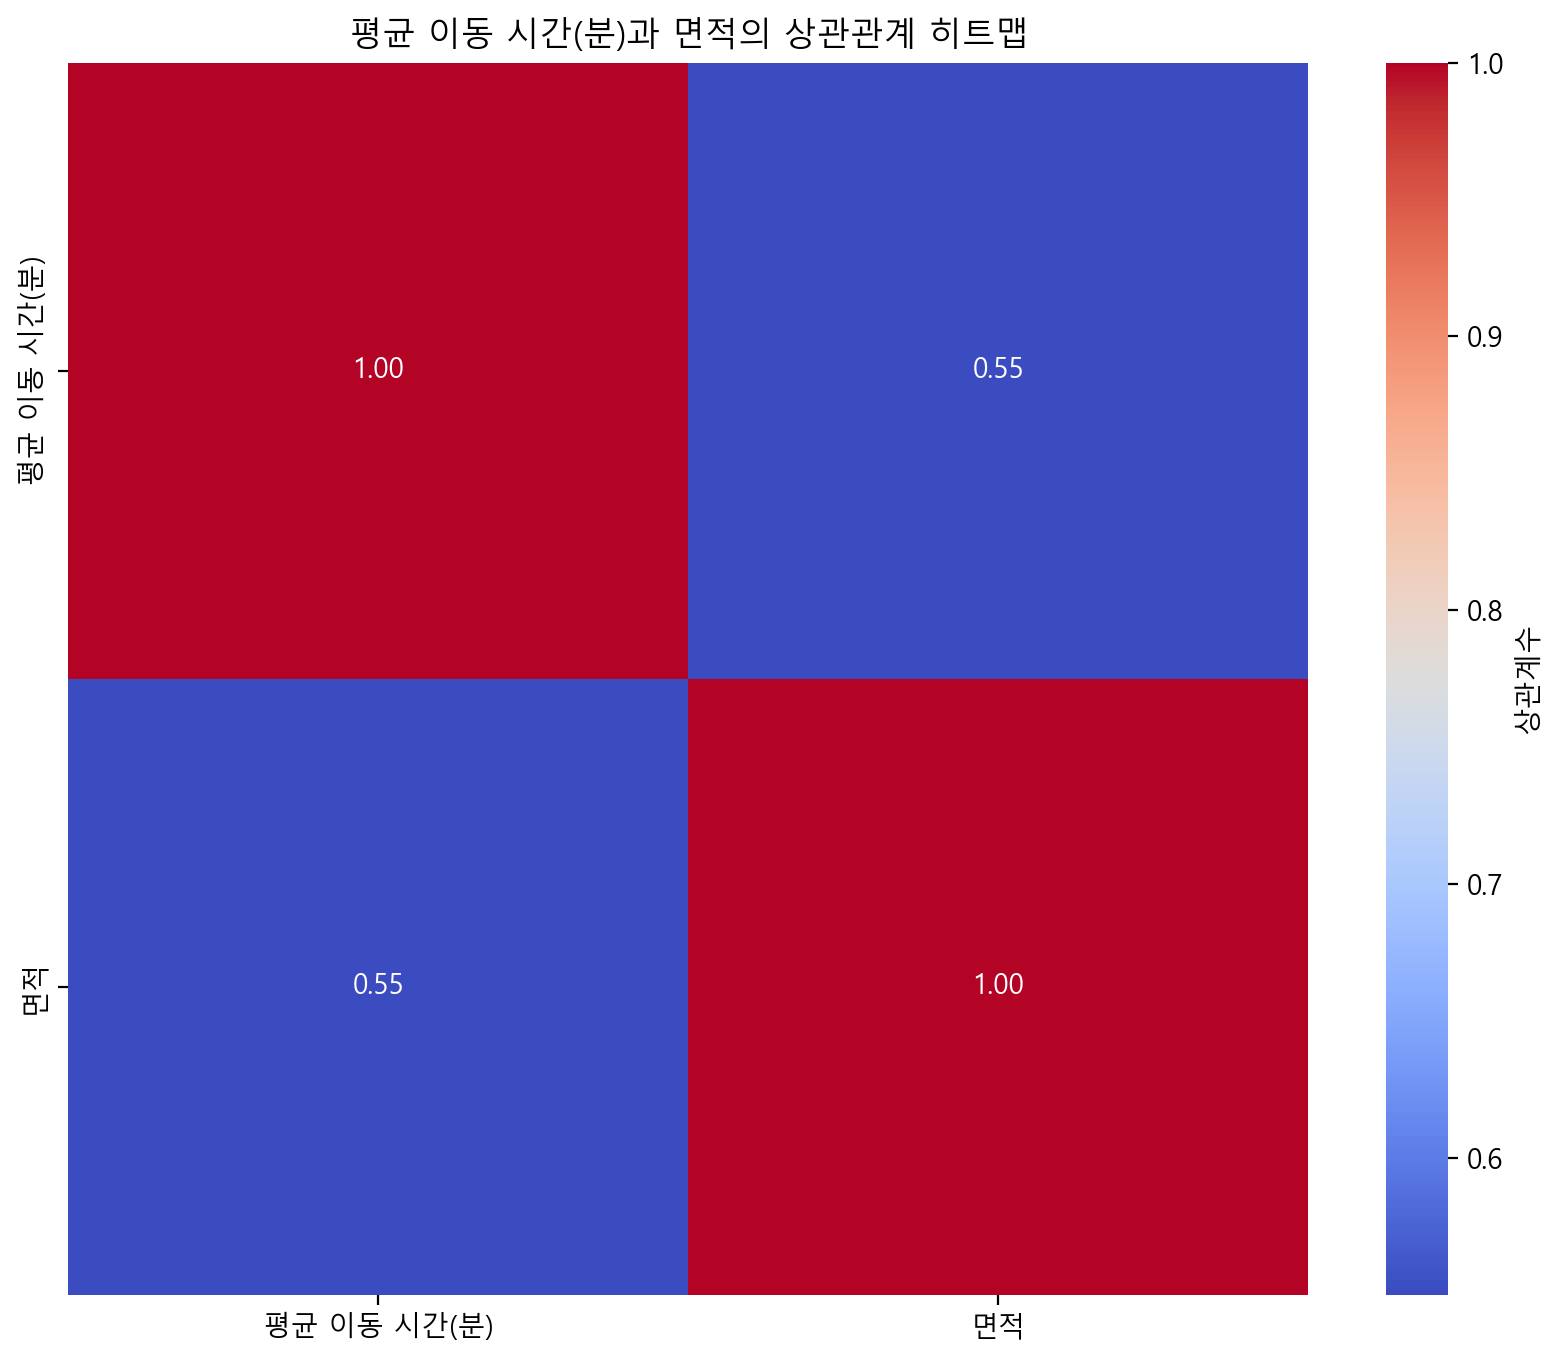

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(df5.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': '상관계수'})

plt.title('평균 이동 시간(분)과 면적의 상관관계 히트맵')
plt.show()

In [78]:
print('평균 이동 시간(분)과 면적: ', spst.pearsonr(df5['평균 이동 시간(분)'], df5['면적']))

평균 이동 시간(분)과 면적:  (0.549974481224266, 0.004396902106214143)


- 평균 이동 시간(분)과 면적:  (0.549974481224266, 0.004396902106214143) 상관관계 존재 

In [79]:
df5['면적 대비 평균 이동 시간 비율'] = df5['평균 이동 시간(분)'] / df5['면적']
df5[['자치구', '면적', '평균 이동 시간(분)', '면적 대비 평균 이동 시간 비율']]

,자치구,면적,평균 이동 시간(분),면적 대비 평균 이동 시간 비율
0,강남구,39.50,65.220874,1.651161
1,강동구,24.59,71.135695,2.892871
2,강북구,23.60,65.258796,2.765203
3,강서구,41.45,70.107829,1.691383
4,관악구,29.57,63.064536,2.132720
5,광진구,17.06,60.205262,3.529031
6,구로구,20.12,63.983186,3.180079
7,금천구,13.02,65.848807,5.057512
8,노원구,35.44,66.705984,1.882223
9,도봉구,20.65,66.683308,3.229216


In [80]:
df5_sorted = df5.sort_values(by='면적 대비 평균 이동 시간 비율', ascending=False)
top_20_percent_count = int(len(df5_sorted) * 0.2)
top_20_percent = df5_sorted.head(top_20_percent_count)
top_20_percent[['자치구', '면적', '평균 이동 시간(분)', '면적 대비 평균 이동 시간 비율']]

,자치구,면적,평균 이동 시간(분),면적 대비 평균 이동 시간 비율
23,중구,9.96,56.495425,5.672231
7,금천구,13.02,65.848807,5.057512
10,동대문구,14.22,59.206579,4.163613
11,동작구,16.36,58.500266,3.575811
18,양천구,17.41,61.751584,3.546903


In [81]:
top_20_percent['정류장수'] = df['정류장수']

In [82]:
top_20_percent[['자치구', '면적', '평균 이동 시간(분)', '면적 대비 평균 이동 시간 비율', '정류장수']]

,자치구,면적,평균 이동 시간(분),면적 대비 평균 이동 시간 비율,정류장수
23,중구,9.96,56.495425,5.672231,172
7,금천구,13.02,65.848807,5.057512,344
10,동대문구,14.22,59.206579,4.163613,309
11,동작구,16.36,58.500266,3.575811,435
18,양천구,17.41,61.751584,3.546903,319


In [83]:
top_20_mean_routes = top_20_percent['정류장수'].mean()
print(f"상위 20% 자치구의 평균 정류장 수: {top_20_mean_routes:.2f}개")

top_20_mean_ratio = top_20_percent['면적 대비 평균 이동 시간 비율'].mean()
print(f"상위 20% 자치구의 면적 대비 평균 이동 시간 비율: {top_20_mean_ratio:.2f}")

상위 20% 자치구의 평균 정류장 수: 315.80개
상위 20% 자치구의 면적 대비 평균 이동 시간 비율: 4.40


> 중구, 금천구에 정류장 수 확충 필요 

### 6) 가설 6

- 자치구 크기 별 음식점 비율에 따라 노선 수와 정류장 수도 많을 것이다. --> 크기 별 음식점 수 비율이 높은데 노선&정류장 수가 낮은 구에 노선과 정류장 확충 필요

In [84]:
df6 = df6[['자치구','정류장수','노선수','면적','음식점']]
df6.head()

,자치구,정류장수,노선수,면적,음식점
0,강남구,502,99,39.50,26295
1,강동구,376,24,24.59,7856
2,강북구,410,71,23.60,6209
3,강서구,565,54,41.45,11097
4,관악구,465,82,29.57,9038


In [85]:
df6['면적 별 음식점 수 비율'] = df6['음식점'] / df6['면적']

In [86]:
df6_sorted = df6.sort_values(by='면적 별 음식점 수 비율', ascending=False)
df6_sorted.head()

,자치구,정류장수,노선수,면적,음식점,면적 별 음식점 수 비율
23,중구,172,102,9.96,13059,1311.144578
0,강남구,502,99,39.50,26295,665.696203
12,마포구,561,102,23.85,14667,614.968553
19,영등포구,466,101,24.55,13411,546.272912
22,종로구,359,107,23.91,12920,540.359682


In [87]:
df_6_corr = df6_sorted[['정류장수', '노선수', '면적 별 음식점 수 비율']].corr()

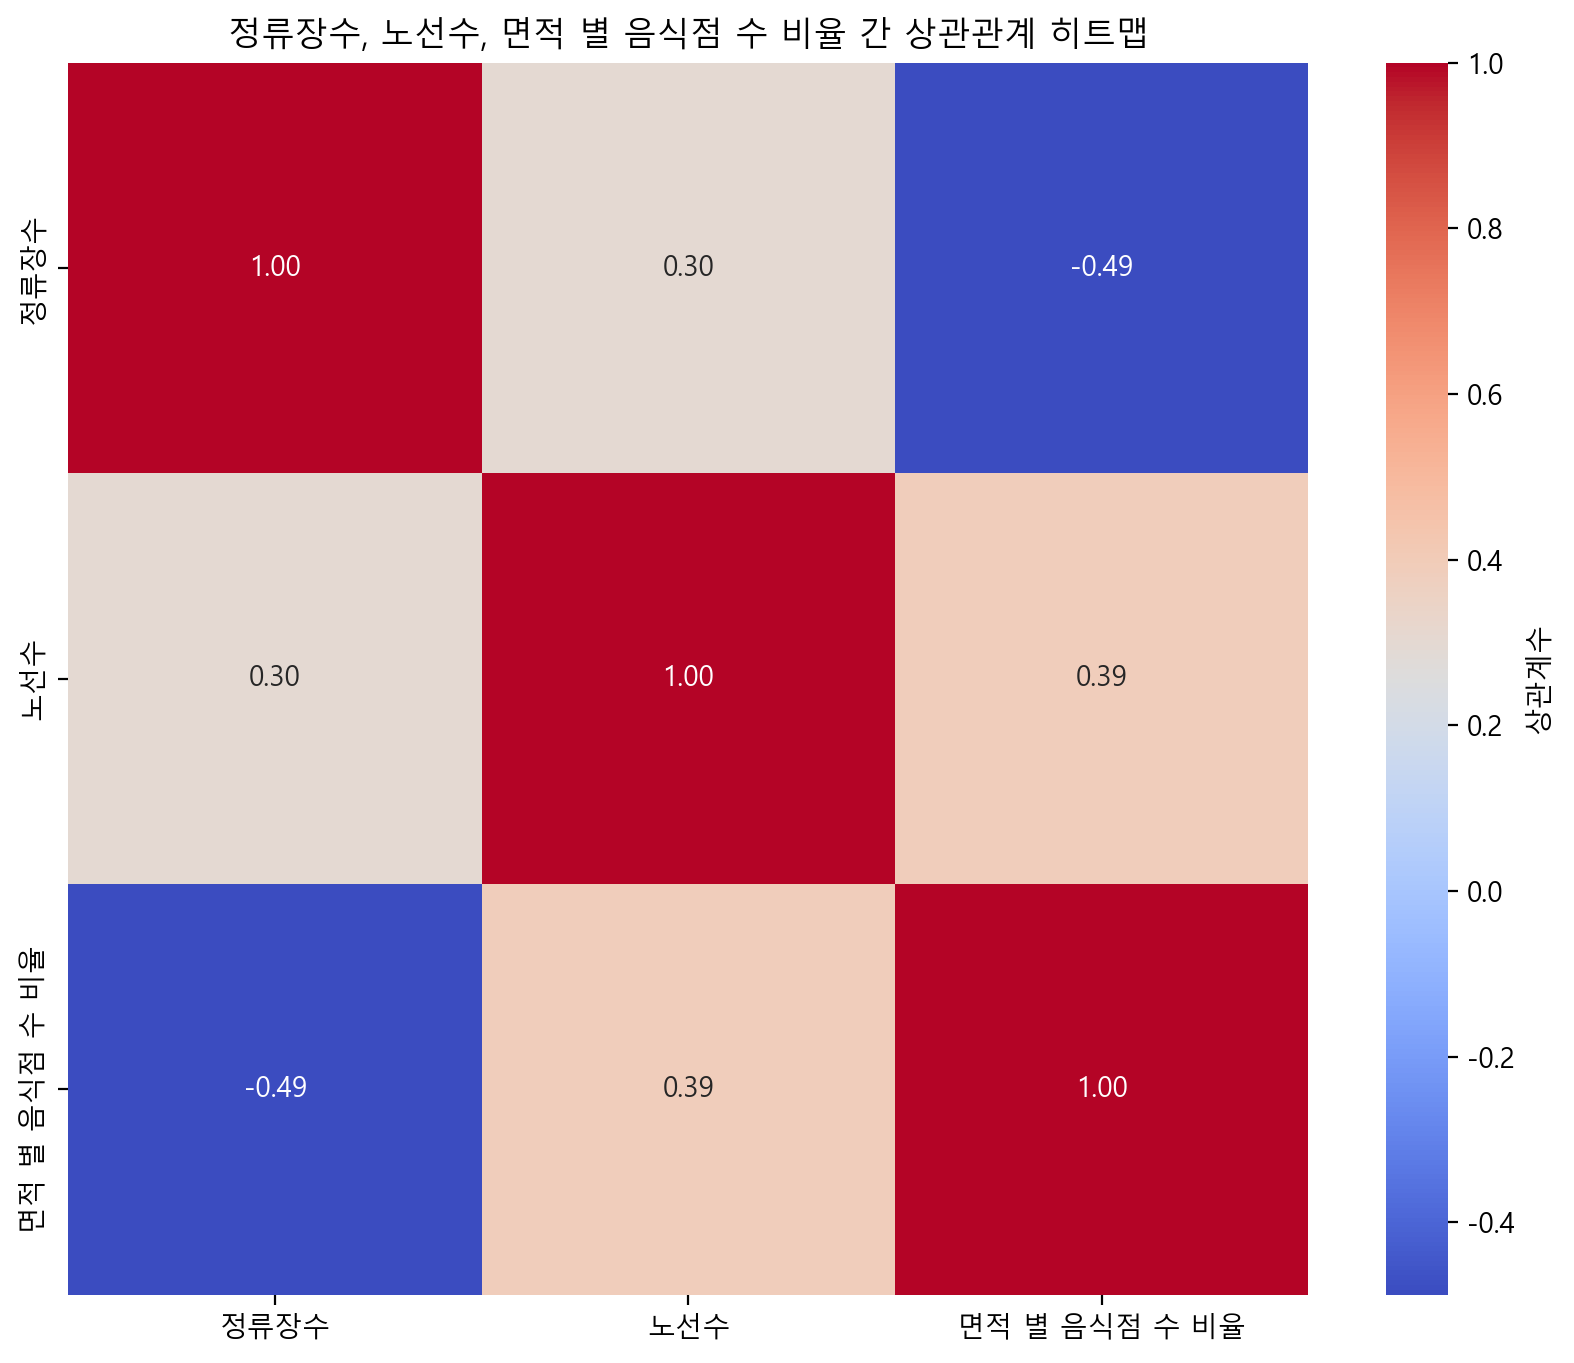

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_6_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': '상관계수'})

plt.title('정류장수, 노선수, 면적 별 음식점 수 비율 간 상관관계 히트맵')
plt.show()

In [89]:
print('정류장수와와 면적 별 음식점 수 비율: ', spst.pearsonr(df6['정류장수'], df6['면적 별 음식점 수 비율']))
print('노선수와와 면적 별 음식점 수 비율: ', spst.pearsonr(df6['노선수'], df6['면적 별 음식점 수 비율']))

정류장수와와 면적 별 음식점 수 비율:  (-0.4873224031444997, 0.013479992385761783)
노선수와와 면적 별 음식점 수 비율:  (0.389455910154624, 0.054310807207534)


- 정류장수와와 면적 별 음식점 수 비율:  (-0.4873224031444997, 0.013479992385761783) 음의 상관관계 존재
- 노선수와와 면적 별 음식점 수 비율:  (0.389455910154624, 0.054310807207534) 가설 기각

In [90]:
top_20_percent_restaurant = df6[df6['면적 별 음식점 수 비율'] > df6['면적 별 음식점 수 비율'].quantile(0.8)]
top_20_percent_restaurant['정류장수'] = df['정류장수']

print("면적 대비 음식점 수 비율이 높은 자치구 상위 20%:")
top_20_percent_restaurant[['정류장수','면적 별 음식점 수 비율']]

면적 대비 음식점 수 비율이 높은 자치구 상위 20%:


,정류장수,면적 별 음식점 수 비율
0,502,665.696203
12,561,614.968553
19,466,546.272912
22,359,540.359682
23,172,1311.144578


In [91]:
df6_sorted = df6.sort_values(by='면적 별 음식점 수 비율', ascending=False)
df6_sorted

,자치구,정류장수,노선수,면적,음식점,면적 별 음식점 수 비율
23,중구,172,102,9.96,13059,1311.144578
0,강남구,502,99,39.50,26295,665.696203
12,마포구,561,102,23.85,14667,614.968553
19,영등포구,466,101,24.55,13411,546.272912
22,종로구,359,107,23.91,12920,540.359682
10,동대문구,309,75,14.22,7629,536.497890
5,광진구,278,43,17.06,8003,469.109027
7,금천구,344,56,13.02,5561,427.112135
15,성동구,432,58,16.82,6810,404.875149
17,송파구,476,62,33.88,13382,394.982290


In [92]:
top_20_percent_count = int(len(df6_sorted) * 0.2)
top_20_percent = df6_sorted.head(top_20_percent_count)
top_20_percent[['자치구', '정류장수', '면적 별 음식점 수 비율']]

,자치구,정류장수,면적 별 음식점 수 비율
23,중구,172,1311.144578
0,강남구,502,665.696203
12,마포구,561,614.968553
19,영등포구,466,546.272912
22,종로구,359,540.359682


In [93]:
top_20_mean_routes = top_20_percent['정류장수'].mean()
print(f"상위 20% 자치구의 평균 정류장 수: {top_20_mean_routes:.2f}개")

상위 20% 자치구의 평균 정류장 수: 412.00개


> 중구에 노선 확충 필요

## 결론: 어느 구에 버스 노선 또는 정류장이 제일 필요한가요?

- 가설 1에 따라 관악구에 노선 확충이 필요하다.
- 가설 2 기각
- 가설 3에 따라 송파구와 용산구에 노선 확충이 필요하다.
- 가설 4에 따라 중구와 강남구에 노선 확충이 필요하다. 
- 가설 5에 따라 중구와 금천구에 노선 확충이 필요하다.
- 가설 6에 따라 중구에 노선 확충이 필요하다. 